In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

#To have a colorful background on graphs
sns.set(color_codes=True)
%matplotlib inline
sns.set(color_codes=True)
import warnings


# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)



# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#To build model using DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#To impute
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# To get diferent metric scores
from sklearn import metrics

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# SHapley Additive exPlanations
import shap

In [2]:
#Import the dataset into dataframe
df = pd.read_csv('BankChurners.csv')

In [3]:
# Make a copy of original dataset
data = df.copy()

In [4]:
print("There are {} rows and {} columns in a dataset".format(data.shape[0], data.shape[1]))

There are 10127 rows and 21 columns in a dataset


In [5]:
#Top 5 rows
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3      12691.00                  777         11914.00   
1                      2       8256.00                  864          7392.00   
2                      0       3418.00                    0          3418.00   
3                      1       3313.00                 2517           796.00   
4                      0       4716.00                    0          4716.00   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                  1.33             1144              42                 1.62   
1                  1.54             1291              33                 3.71   
2                  2.59             1887              20                 2.33   
3                  1.41             1171              20                 2.33   
4                  2.17              816              28                 2.50   

   Avg_Utilization_Ratio  
0                   0.06  
1                   0.10  
2                   0.00  
3                   0.76  
4                   0.00

In [6]:
#Last 5 rows
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3       4003.00                 1851   
10123                      3       4277.00                 2186   
10124                      4       5409.00                    0   
10125                      3       5281.00                    0   
10126                      4      10388.00                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122          2152.00                  0.70            15476             117   
10123          2091.00                  0.80             8764              69   
10124          5409.00                  0.82            10291              60   
10125          5281.00                  0.54             8395              62   
10126          8427.00                  0.70            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                 0.86                   0.46  
10123                 0.68                   0.51  
10124                 0.82                   0.00  
10125                 0.72                   0.00  
10126                 0.65                   0.19

In [7]:
#Get column names
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
#Get datatype of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are 10 columns of Integer datatype;
* There are 5 columns of float datatype;
* There are 6 columns of object datatype 

Let's convert object columns into categorical

In [9]:
#Convert Object datatype into categorical
for col in data.columns:
    if data[col].dtype == object:
        data[col] = data[col].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

Object columns has been updated into category

In [11]:
#Get any null values
data.isnull().sum().sort_values(ascending=False)

Education_Level             1519
Marital_Status               749
Avg_Utilization_Ratio          0
Months_on_book                 0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Income_Category                0
Card_Category                  0
Total_Relationship_Count       0
Total_Ct_Chng_Q4_Q1            0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
CLIENTNUM                      0
dtype: int64

Education_Level and Marital_Status columns has null values

In [12]:
#Check for any duplicated values
data.duplicated().sum()

0

No duplicated values on a dataset

In [13]:
#Get dataset summary
data.describe().T

count         mean         std          min  \
CLIENTNUM                10127.00 739177606.33 36903783.45 708082083.00   
Customer_Age             10127.00        46.33        8.02        26.00   
Dependent_count          10127.00         2.35        1.30         0.00   
Months_on_book           10127.00        35.93        7.99        13.00   
Total_Relationship_Count 10127.00         3.81        1.55         1.00   
Months_Inactive_12_mon   10127.00         2.34        1.01         0.00   
Contacts_Count_12_mon    10127.00         2.46        1.11         0.00   
Credit_Limit             10127.00      8631.95     9088.78      1438.30   
Total_Revolving_Bal      10127.00      1162.81      814.99         0.00   
Avg_Open_To_Buy          10127.00      7469.14     9090.69         3.00   
Total_Amt_Chng_Q4_Q1     10127.00         0.76        0.22         0.00   
Total_Trans_Amt          10127.00      4404.09     3397.13       510.00   
Total_Trans_Ct           10127.00        64.86       23.47        10.00   
Total_Ct_Chng_Q4_Q1      10127.00         0.71        0.24         0.00   
Avg_Utilization_Ratio    10127.00         0.27        0.28         0.00   

                                  25%          50%          75%          max  
CLIENTNUM                713036770.50 717926358.00 773143533.00 828343083.00  
Customer_Age                    41.00        46.00        52.00        73.00  
Dependent_count                  1.00         2.00         3.00         5.00  
Months_on_book                  31.00        36.00        40.00        56.00  
Total_Relationship_Count         3.00         4.00         5.00         6.00  
Months_Inactive_12_mon           2.00         2.00         3.00         6.00  
Contacts_Count_12_mon            2.00         2.00         3.00         6.00  
Credit_Limit                  2555.00      4549.00     11067.50     34516.00  
Total_Revolving_Bal            359.00      1276.00      1784.00      2517.00  
Avg_Open_To_Buy               1324.50      3474.00      9859.00     34516.00  
Total_Amt_Chng_Q4_Q1             0.63         0.74         0.86         3.40  
Total_Trans_Amt               2155.50      3899.00      4741.00     18484.00  
Total_Trans_Ct                  45.00        67.00        81.00       139.00  
Total_Ct_Chng_Q4_Q1              0.58         0.70         0.82         3.71  
Avg_Utilization_Ratio            0.02         0.18         0.50         1.00

#### Observations:
* CLIENTNUM is the Identification number for each client, widely distributed
* Customer_Age is slightly right skewed but close to normal distribution, in a range from 26 to 72 y.o. clients
* Dependent_count  is slightly right skewed but still close to normal distribution. And column ranges from 0 to 5
* Months_on_book is slightly left skewed, with a range from 13 to 56
* Total_Relationship_Count is left skewed, ranging from 1 to 6
* Months_Inactive_12_mon is rightly skewed, ranging from 0 to 6
* Contacts_Count_12_mon is rightly skewed, ranging from 0 to 6
* Credit_Limit is heavily right skewed, with extreme values > 30000. Need to take a look at those
* Total_Revolving_Bal.  is left skewed
* Avg_Open_To_Buy  is heavily rightly skewed, need to be looked at
* Total_Amt_Chng_Q4_Q1 is slightly right skewed
* Total_Trans_Amt is rightly skewed, needs to be looked at
* Total_Trans_Ct is left skewed 
* Total_Ct_Chng_Q4_Q1 is very close to normal distribution
* Avg_Utilization_Ratio is rightly skewed, within a range from 0 to 1 

# EDA

In [14]:
#Getting count for each column
for col in data.columns:
    print(data[col].value_counts())

780097533    1
720049083    1
717376758    1
720598308    1
719930658    1
            ..
818987958    1
808753758    1
789347133    1
806189658    1
713594883    1
Name: CLIENTNUM, Length: 10127, dtype: int64
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
60    127
33    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
73      1
70      1
Name: Customer_Age, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
Graduate         3128
High School      2013
Uneducated       1487
College    

* CLIENTNUM has 10127 unique values, column should be dropped, as has no value to model building
* Customer_Age should be binned on values
* Income_Category column has "abc" value, need to be checked out

In [15]:
#Drop CLIENTNUM column
data = data.drop('CLIENTNUM', axis=1)

In [16]:
# Replacing abc values to Null
data['Income_Category'] = data['Income_Category'].replace('abc', np.nan)

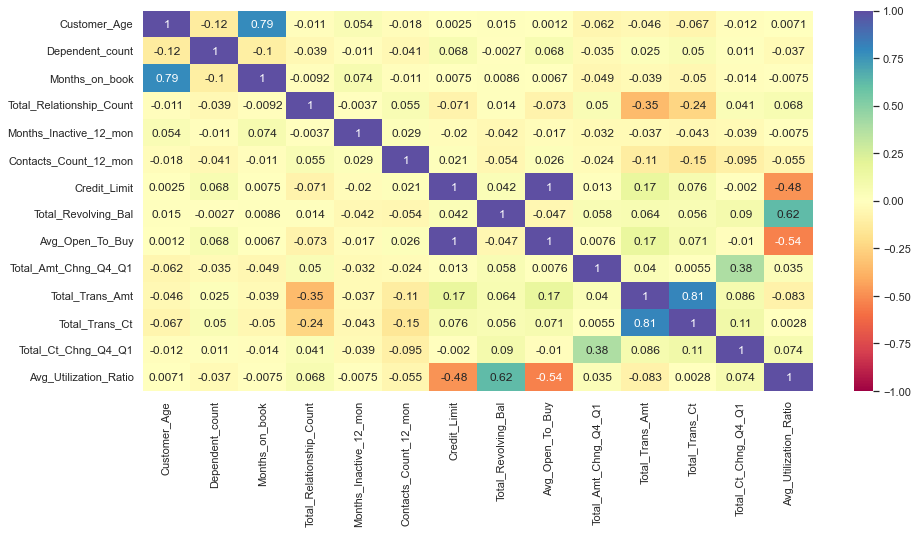

In [17]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), vmin = -1, vmax=1, cmap='Spectral', annot=True);
plt.show()

Positive correlation:
* Months_on_book and Customer_Age
* Total_Revolving_Bal and Avg_Utilization_Ratio
* Somewhat correlation between Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1

Negative correlation:
* Avg_Open_To_Buy and Avg_Utilization_Ratio
* Creadit_Limit and Avg_Utilization_Ratio
* Somewhat correlation between Total_Trans_Amt and Total_Relationship_Count

### Univariate Analysis 

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

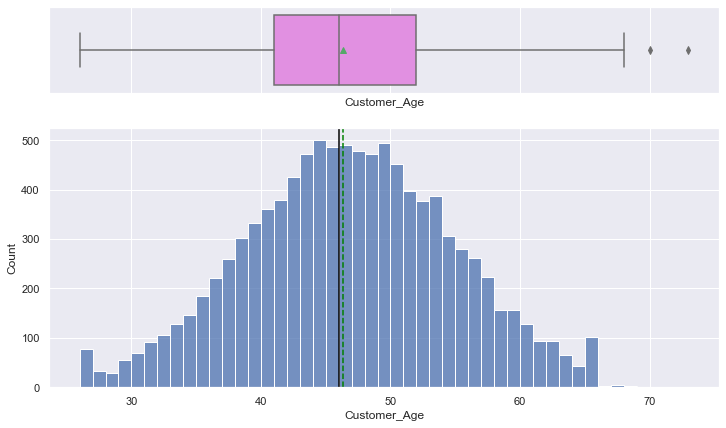

In [19]:
histogram_boxplot(data, 'Customer_Age')

Customer_Age looks nicely normal distributed, with a very slight right skew

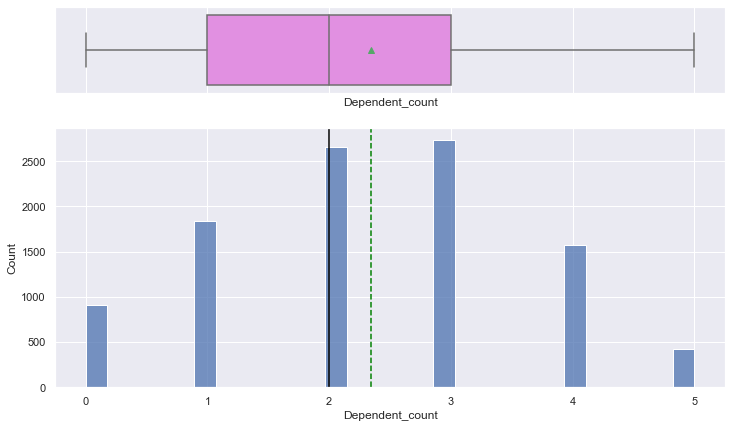

In [20]:
histogram_boxplot(data, 'Dependent_count')

Dependent_count slightly right skewed with mean between 2 and 3

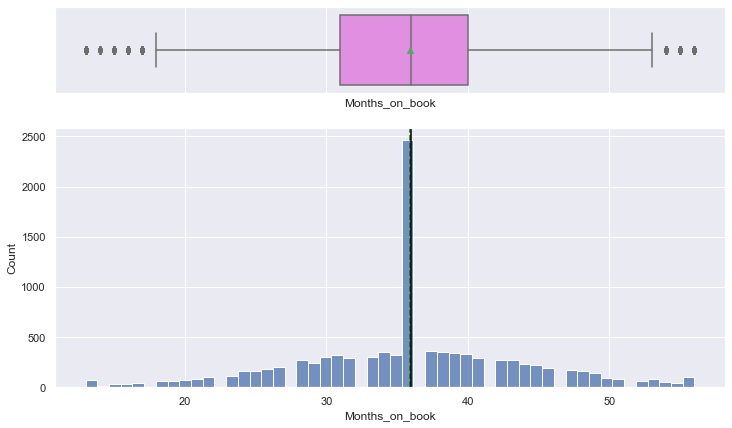

In [21]:
histogram_boxplot(data, 'Months_on_book')

Months_on_book is close to normal distribution but has outliers on the left and right whiskers

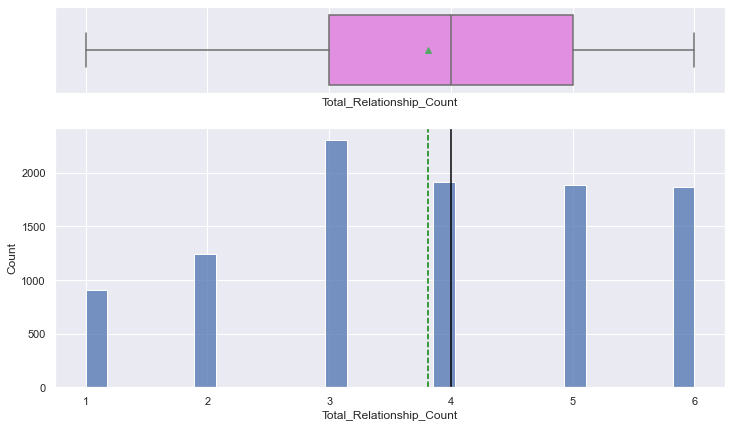

In [22]:
histogram_boxplot(data, 'Total_Relationship_Count')

Total_Relationship_Count is left skewed with mean a little less than 4

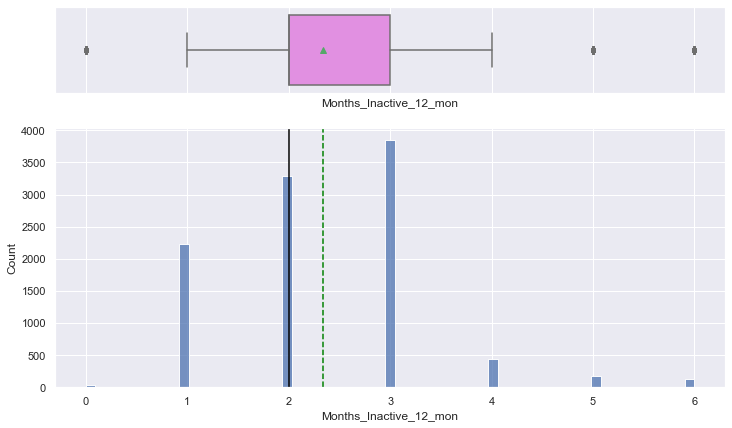

In [23]:
histogram_boxplot(data, 'Months_Inactive_12_mon')

Months_Inactive_12_mon is rightly skewed with Outliers on the left and right whiskers

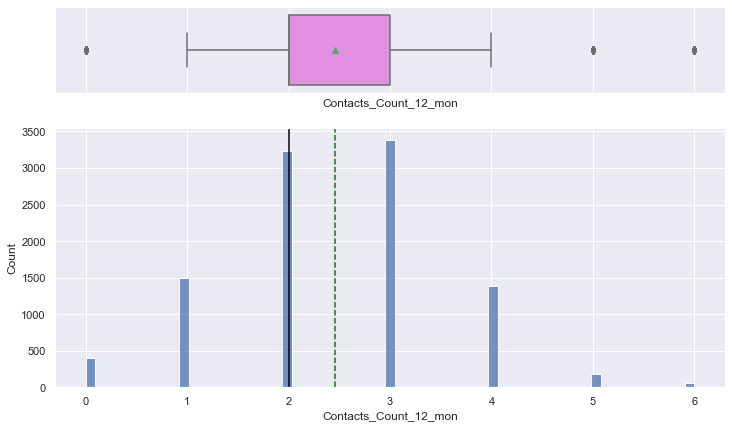

In [24]:
histogram_boxplot(data, 'Contacts_Count_12_mon')

Contacts_Count_12_mon is rightly skewed with Outliers on the left and right whiskers

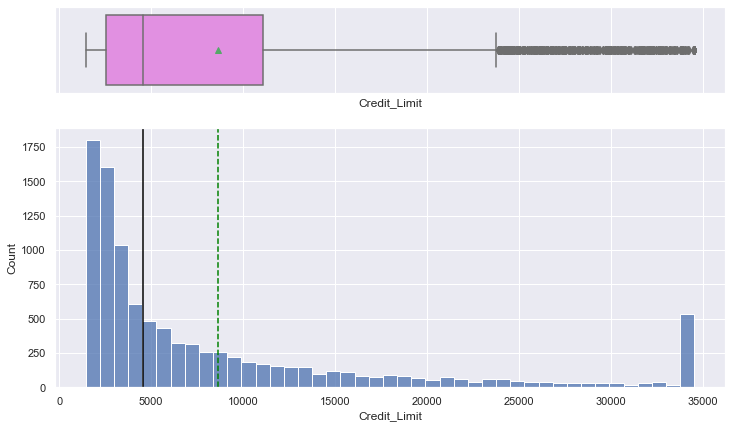

In [25]:
histogram_boxplot(data, 'Credit_Limit')

Credit_Limit is heavily right skewed 

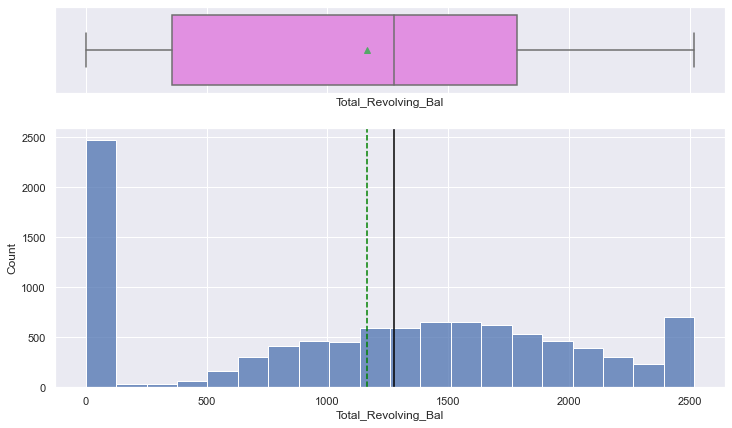

In [26]:
histogram_boxplot(data, 'Total_Revolving_Bal')

Total_Revolving_Bal is left skewed 

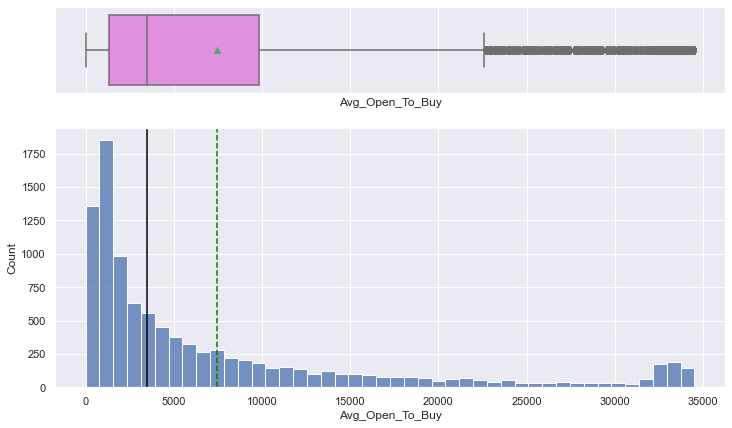

In [27]:
histogram_boxplot(data, 'Avg_Open_To_Buy')

Avg_Open_To_Buy is heavily right skewed 

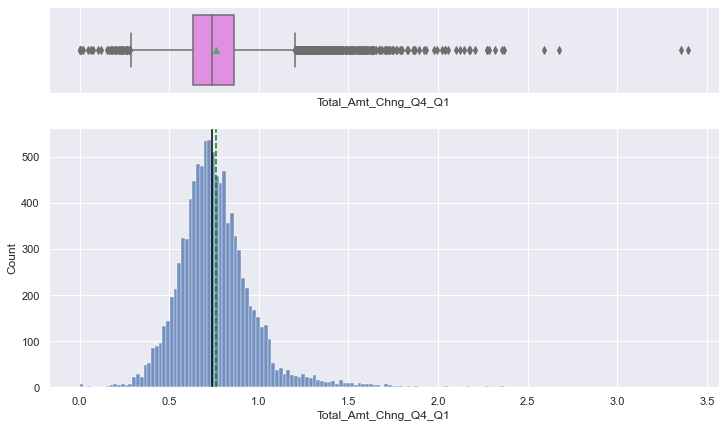

In [28]:
histogram_boxplot(data, 'Total_Amt_Chng_Q4_Q1')

Total_Amt_Chng_Q4_Q1 close to normal distribution with a slight right skew, and outliers on left and right whiskers

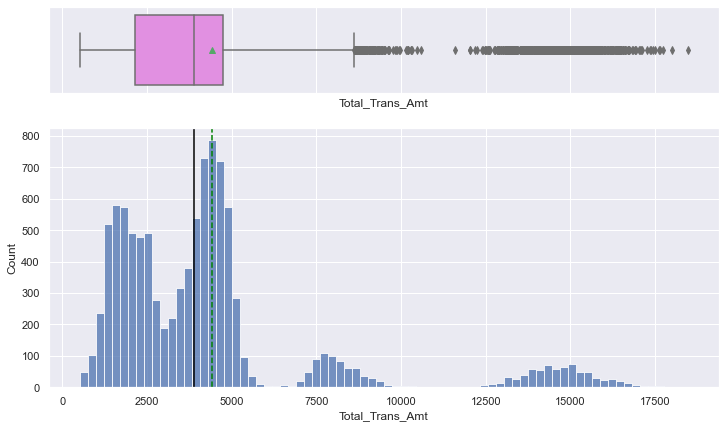

In [29]:
histogram_boxplot(data, 'Total_Trans_Amt')

Total_Trans_Amt is heavily right skewed with outliers on a right whisker. Shape looks as a polynomial distribution

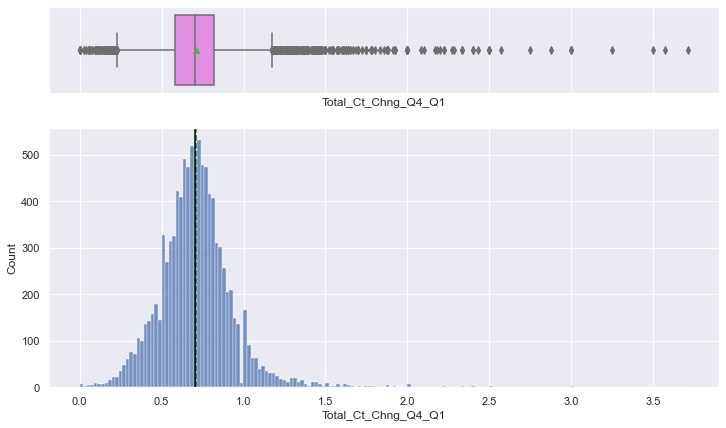

In [30]:
histogram_boxplot(data, 'Total_Ct_Chng_Q4_Q1')

Total_Ct_Chng_Q4_Q1 is normally distributed with Outliers on the left and right whiskers

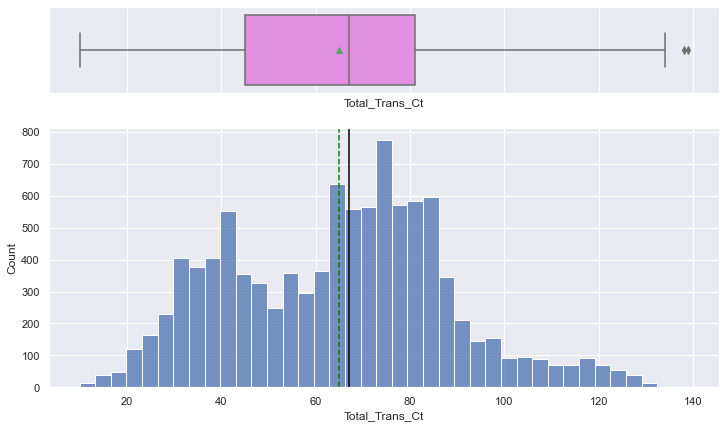

In [31]:
histogram_boxplot(data, 'Total_Trans_Ct')

Total_Trans_Ct is left skewed, with some Outliers on the right

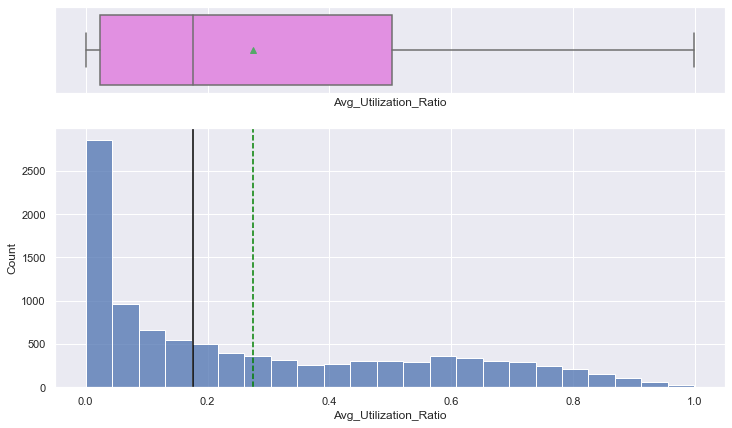

In [32]:
histogram_boxplot(data, 'Avg_Utilization_Ratio')

Avg_Utilization_Ratio is rightly skewed with a long right tail, ranging from 0 to 1

In [33]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values()
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

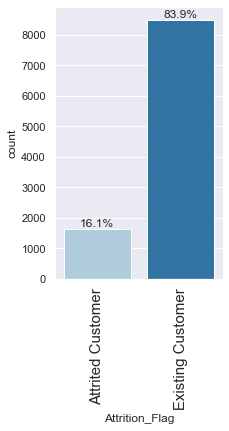

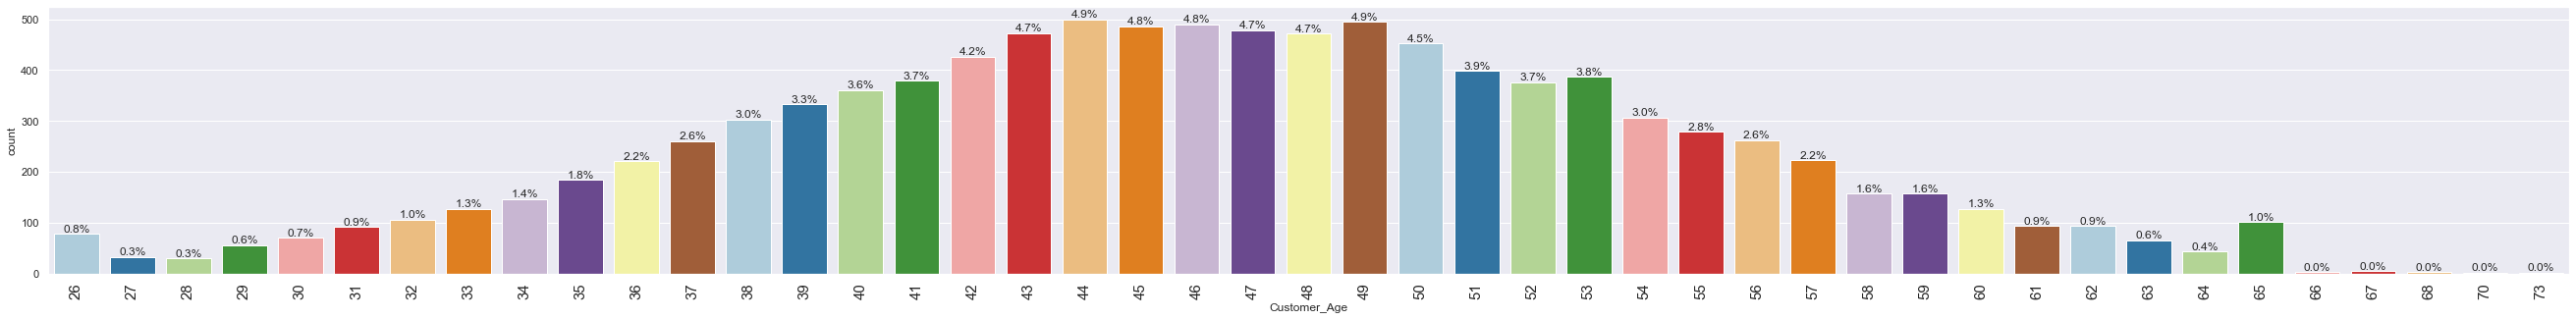

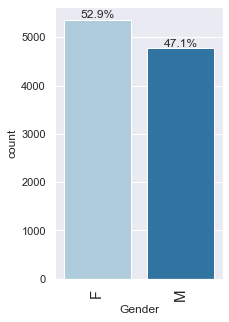

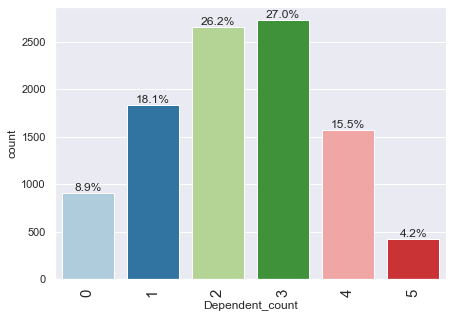

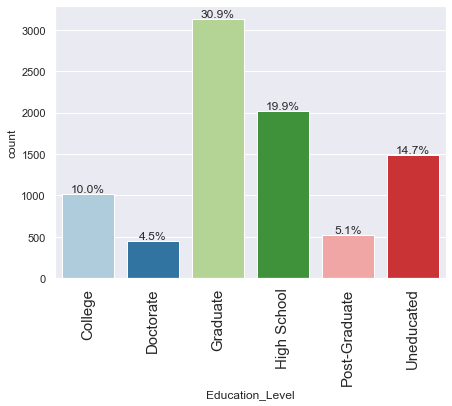

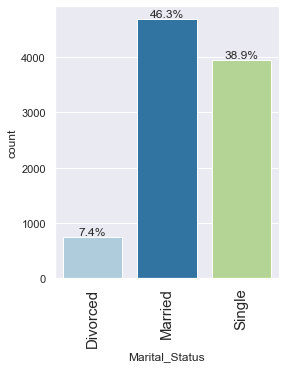

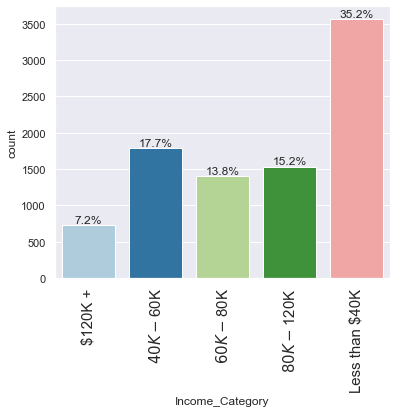

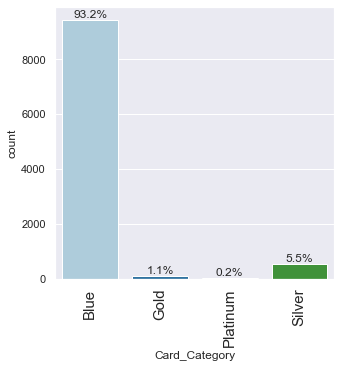

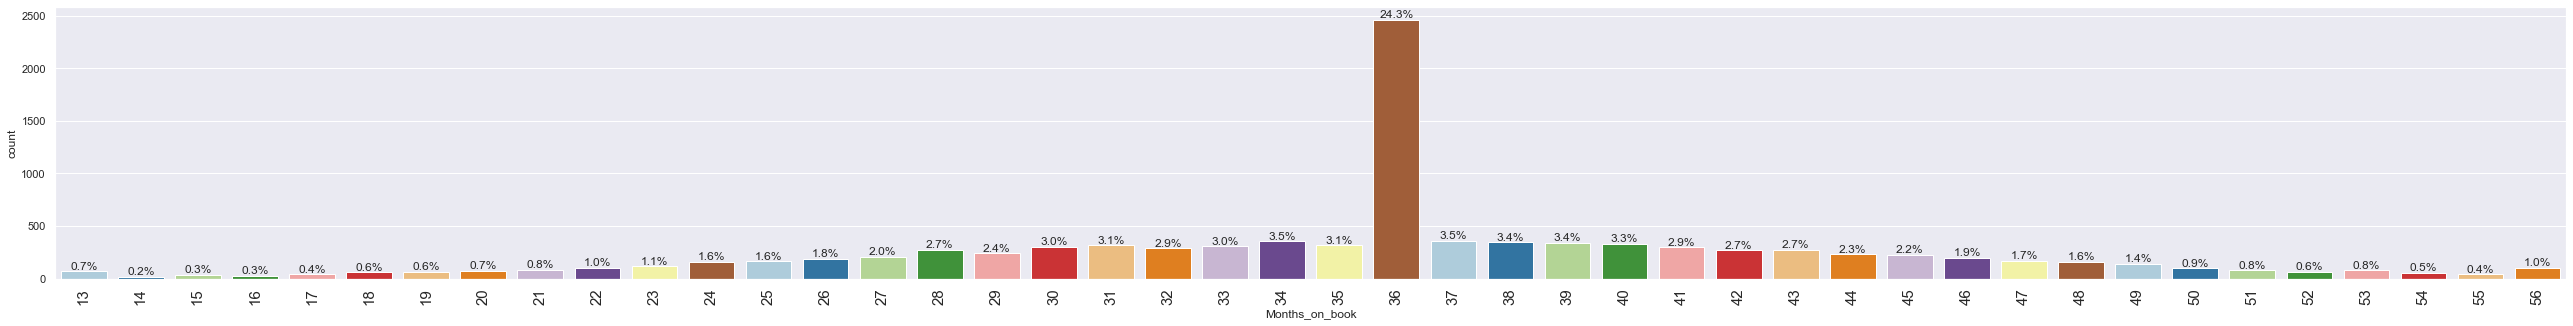

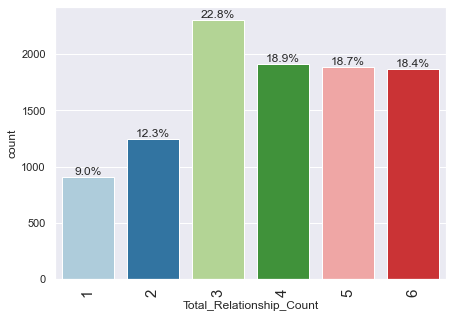

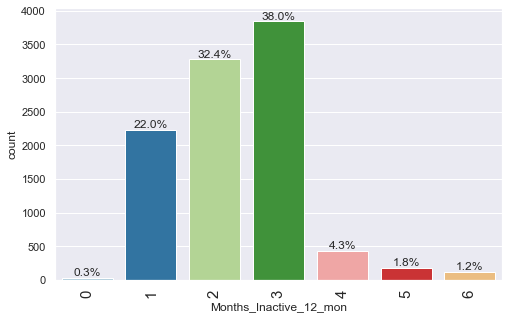

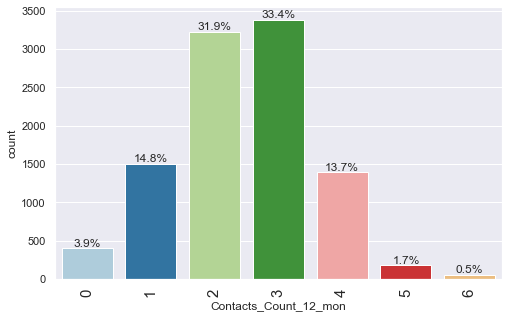

In [34]:
for col in data.columns:
    if col == 'Credit_Limit':
        break
    labeled_barplot(data, col, perc=True)

* There is imbalanced class on a dataset for Attrition_Flag. 83.9% of customers are existing, while 16.1% attired
* The most of the customers are in a range of between 40 and 50, but overall range is from 26 to 73
* Female customers are a little over than Male
* Customers has 2 and 3 dependents the most, followed by 1 and 4
* Customers with Graduate education level are the most, followed by High School and Uneducated customers. Doctorate and Post-Graduate are the least
* ~ 46% of customers are married, followed by single, and only 7.4% of customers are divorced.
* The most of the customers make less than 40K, while less than 8% of customers make more than 120K
* BLUE credit cards are the majority among customers with more than 90%. Gold, Platinum and Silver are the minority within the same range
* Relationship between bank and the customers are established to be 36 months mostly, and rare cases of less than year and a half or more than 4 years
* Customers tend to obtain 3 products from the bank, followed by 4/5/6. And the least customers left getting a single product only
* In the last 12 months, customers tend to become inactive with the bank for 3 months, followed by 2 and 1 month
* Customer reaches out the bank 2 -3 times in a year mostly, with the least 5-6 times

### Bivariate Analysis 

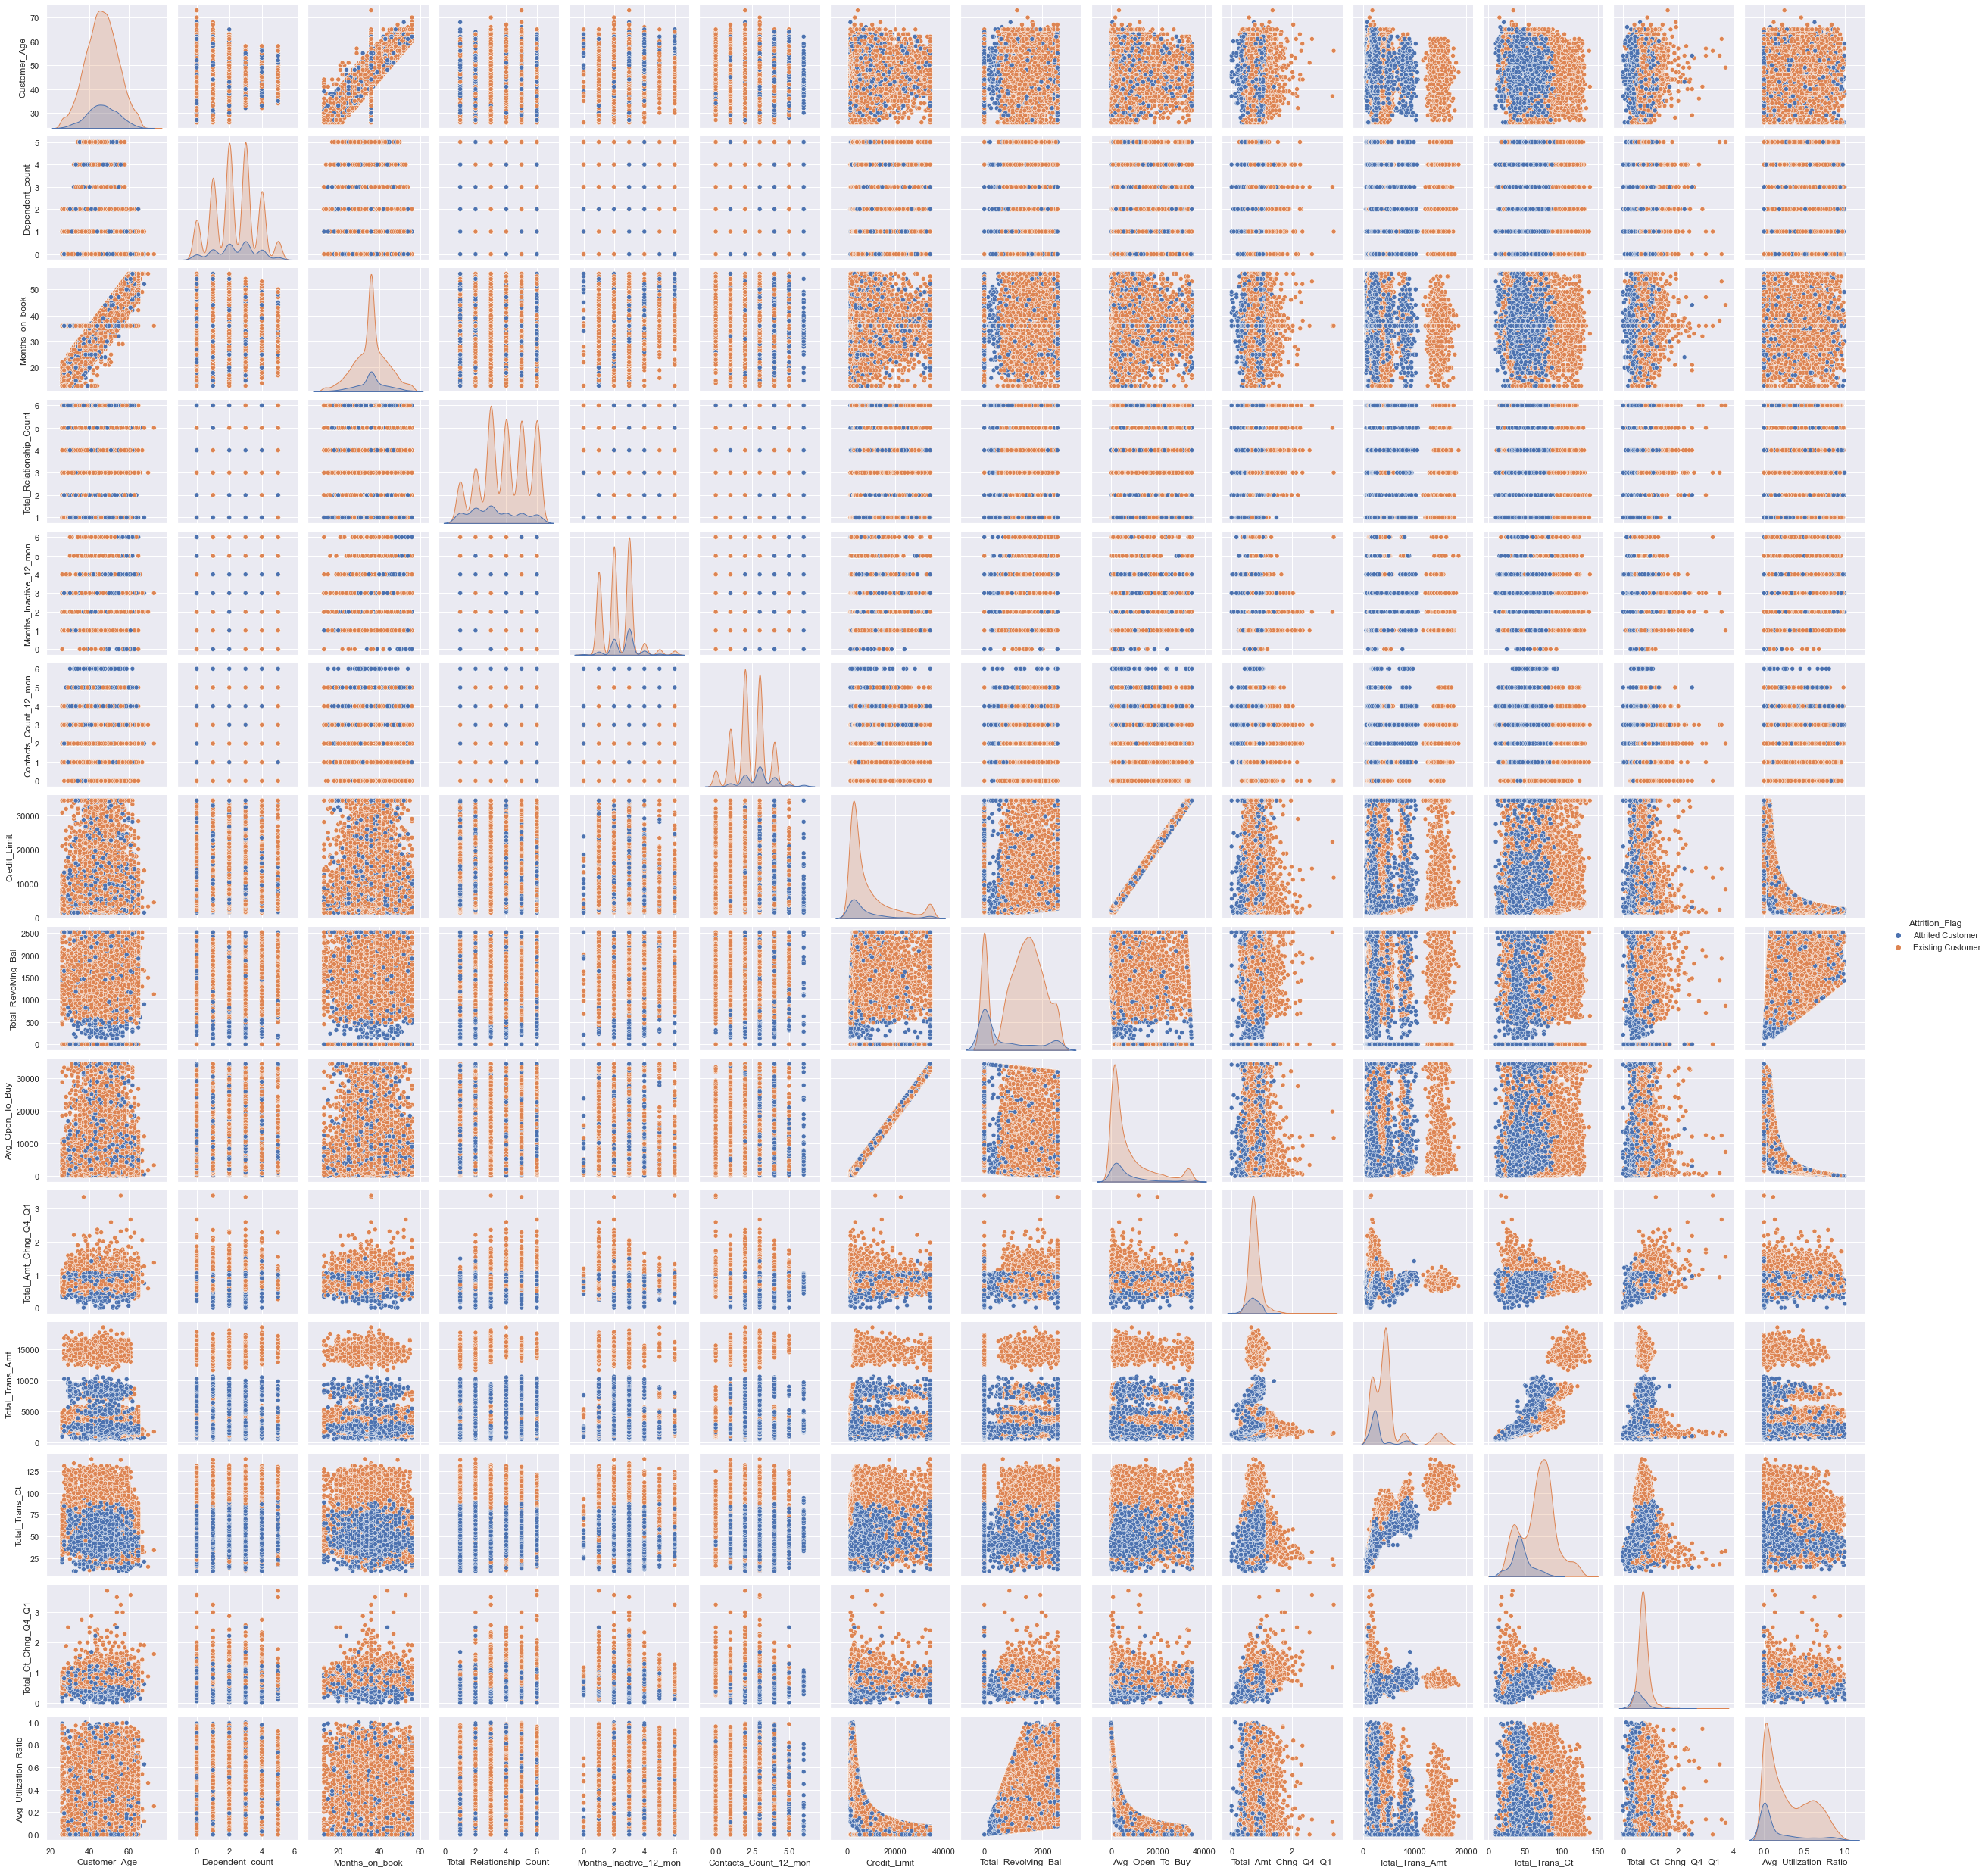

In [35]:
sns.pairplot(data, hue='Attrition_Flag')
plt.show()

Based on above graph, we can conclude that
Negative:
* Avg_Utilization_Ratio and Credit Limit; 
* Avg_Utilization_Ratio and Avg_Open_to_Buy 

Positive:
* Months_On_Book and Customer_Age
* Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1
* Total_Trans_Ct and Total_Trans_Amt
* Avg_Total_To_Buy and Credit Limit

In [36]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

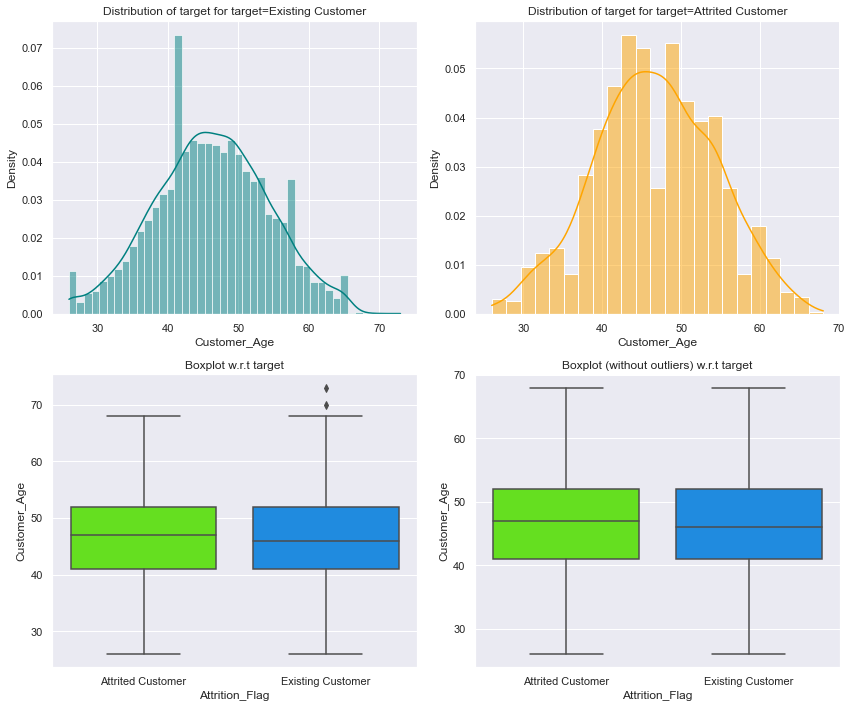

In [37]:
distribution_plot_wrt_target(data, 'Customer_Age', 'Attrition_Flag')

There is no big difference between existing and attired customers. Both class's average ranges between 40 and 50. Existing Customers has some Outliers on a right whisker

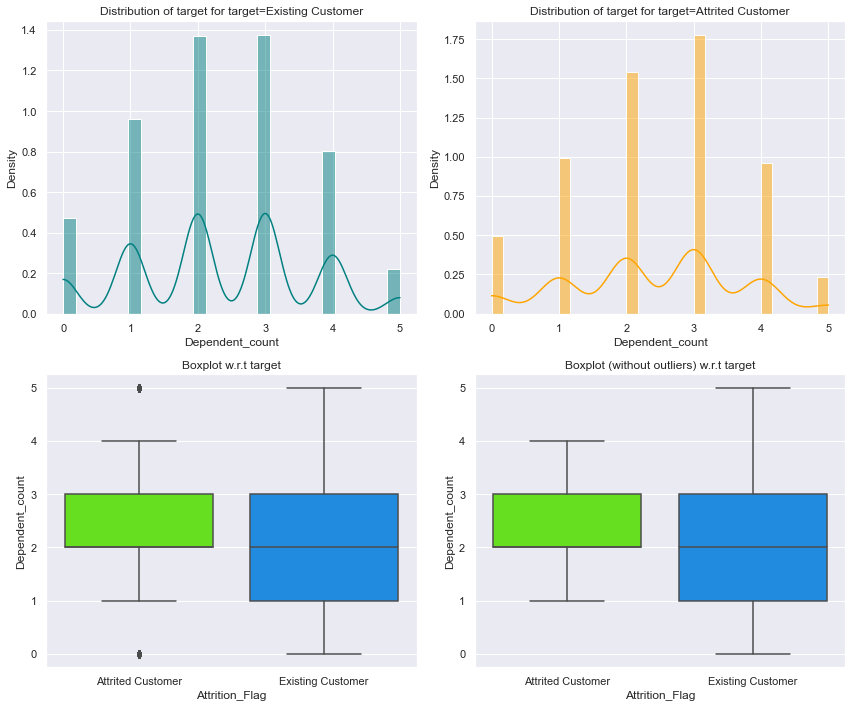

In [38]:
distribution_plot_wrt_target(data, 'Dependent_count', 'Attrition_Flag')

Number of dependents has a wider range for Existing customers. Attired customers has outliers on both sides of the whisker.

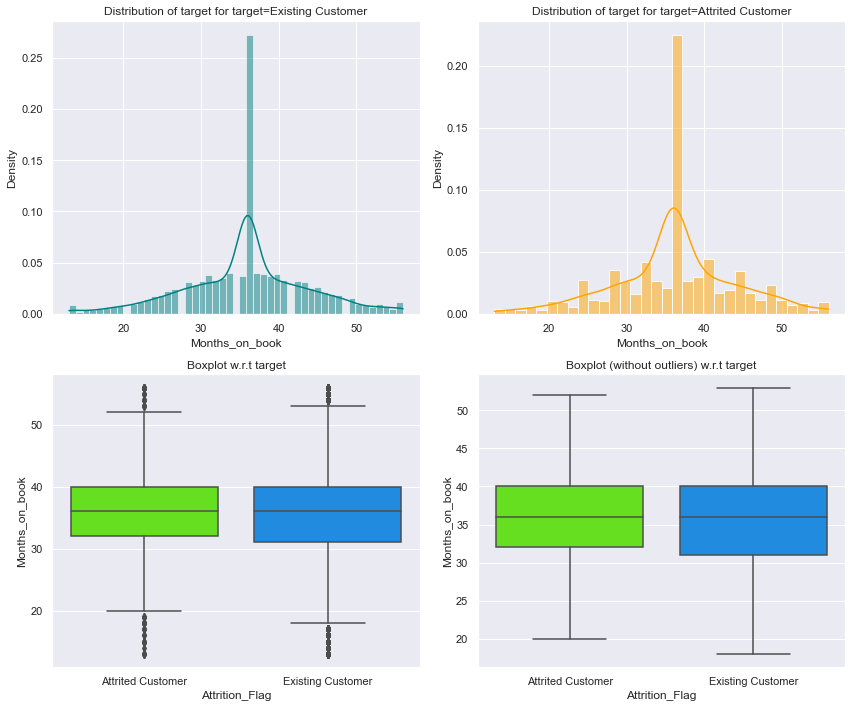

In [39]:
distribution_plot_wrt_target(data, 'Months_on_book', 'Attrition_Flag')

Both type of customers have been enrolled with the bank for a very close period of time, and both has Outliers on the both sides of the whisker

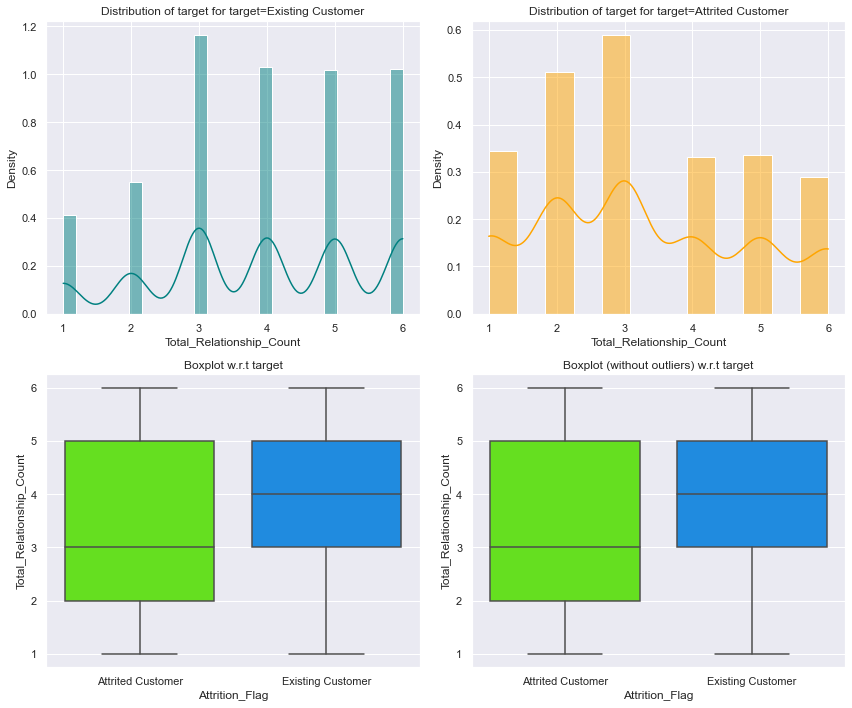

In [40]:
distribution_plot_wrt_target(data, 'Total_Relationship_Count', 'Attrition_Flag')

Number of Products has higher mean at 4 and Normal Distribution shape for Existing Customers, whereas Attired customers 
right skewed and the mean is at 3

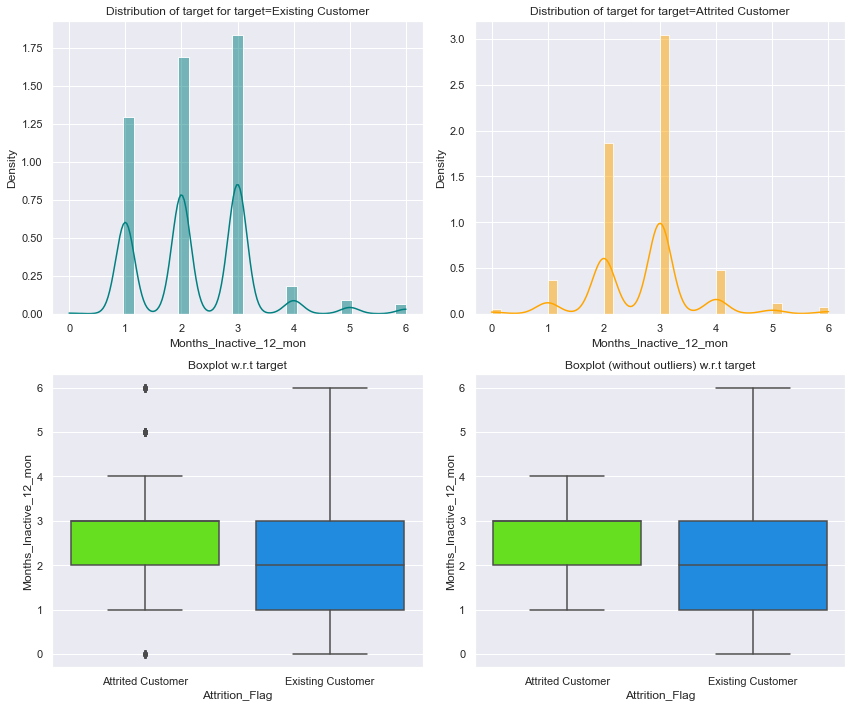

In [41]:
distribution_plot_wrt_target(data, 'Months_Inactive_12_mon', 'Attrition_Flag')

Number of Inactive Months in the last 12 Months for Attired Customers has Outliers, and smaller range than Existing Customers. Existing Customers has a right whisker longer

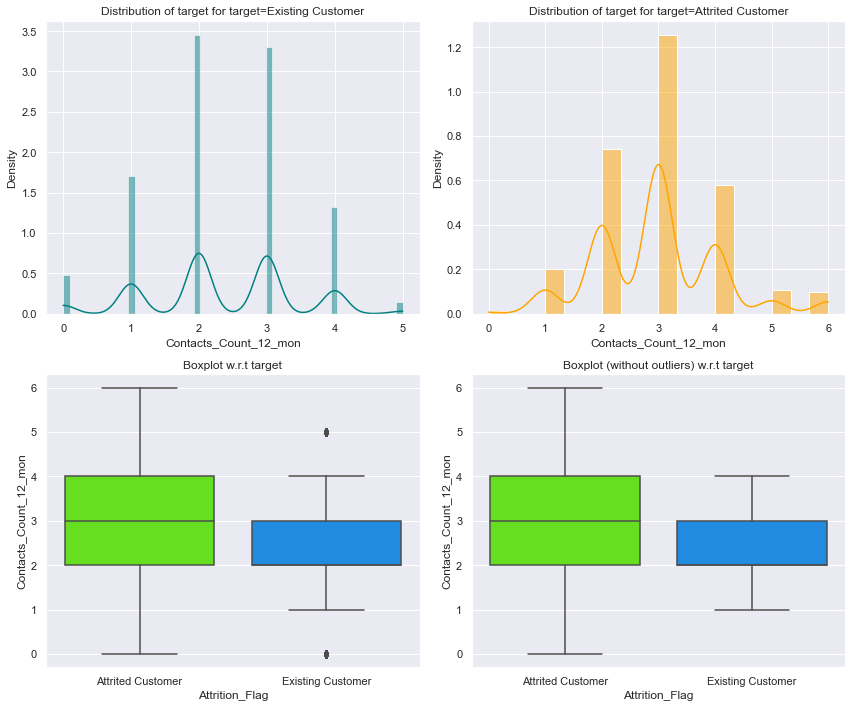

In [42]:
distribution_plot_wrt_target(data, 'Contacts_Count_12_mon', 'Attrition_Flag')

Number of Contacts within the Last 12 Months, has a wider range for Attired Customers, where as Existing Customers has Outliers

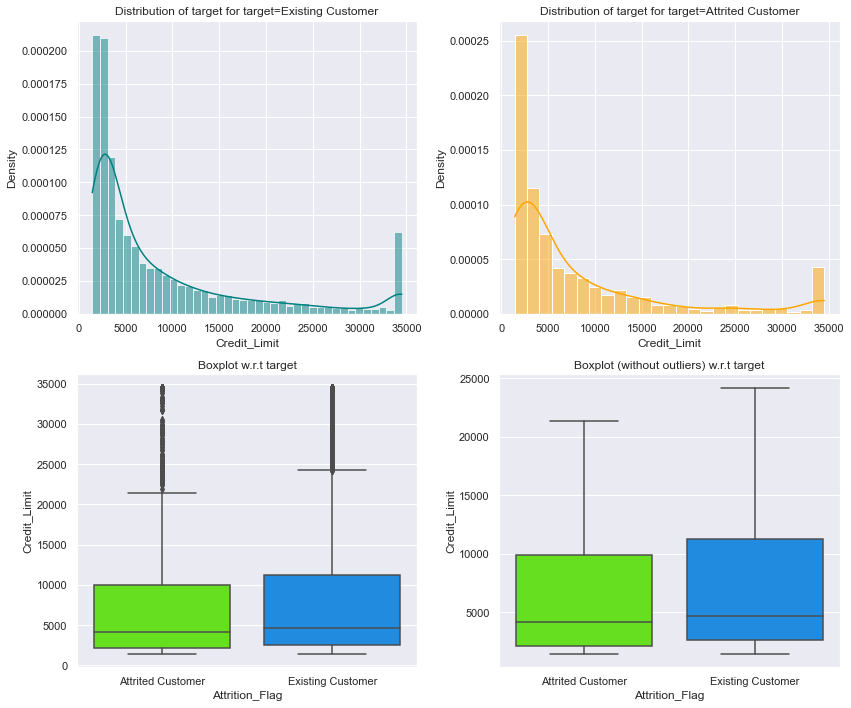

In [43]:
distribution_plot_wrt_target(data, 'Credit_Limit', 'Attrition_Flag')

Credit_Limit is slightly higher for Exaisting Customers, rather than for Attired ones. Both box plots has Outliers and both are rightly skewed

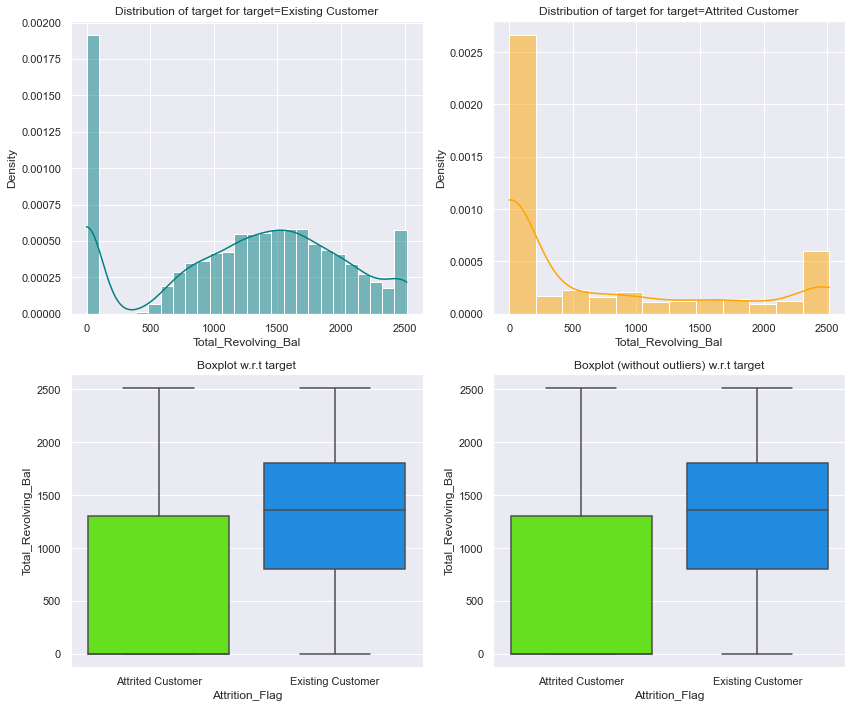

In [44]:
distribution_plot_wrt_target(data, 'Total_Revolving_Bal', 'Attrition_Flag')

The mean of revolving balance for Existing Customers is a lot higher, rather than for Attired customers

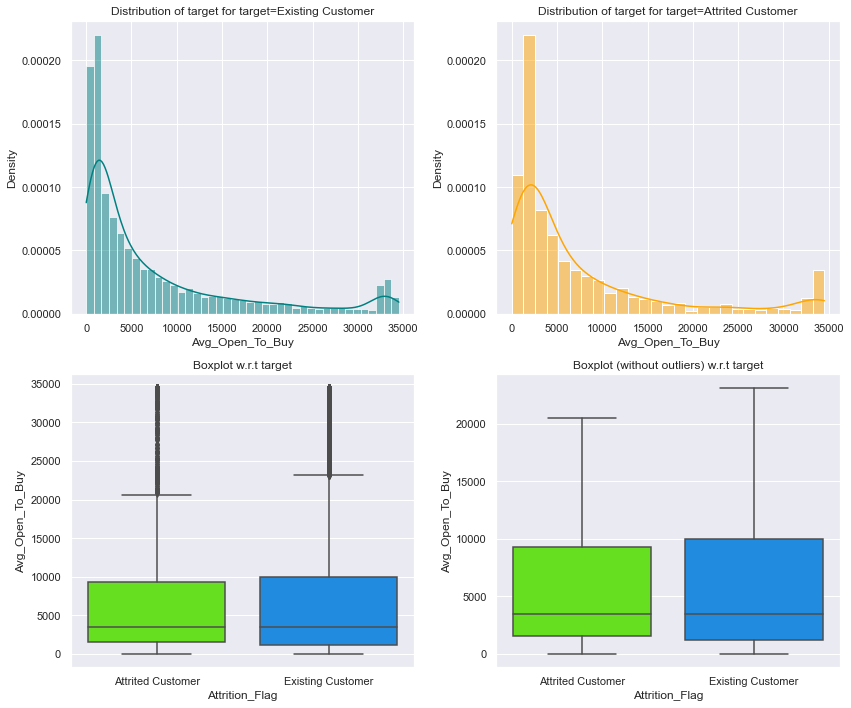

In [45]:
distribution_plot_wrt_target(data, 'Avg_Open_To_Buy', 'Attrition_Flag')

The Mean amount left on the credit card is very close for both Customer types. Both rightly skewed with Outliers on the right

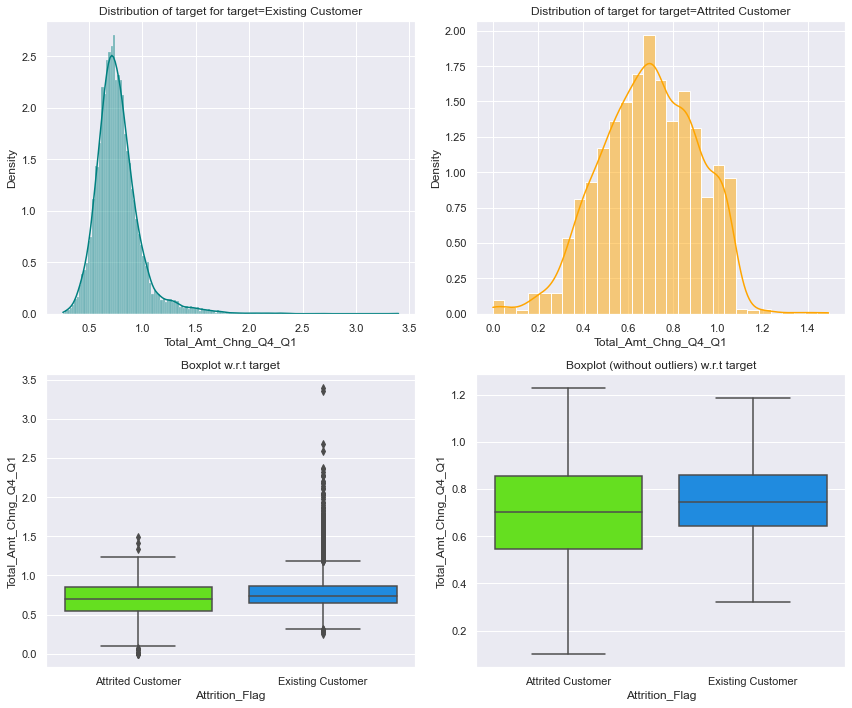

In [46]:
distribution_plot_wrt_target(data, 'Total_Amt_Chng_Q4_Q1', 'Attrition_Flag')

The total transaction amount in 4th quarter and the total transaction amount in 1st quarter is higher on Existing Customers

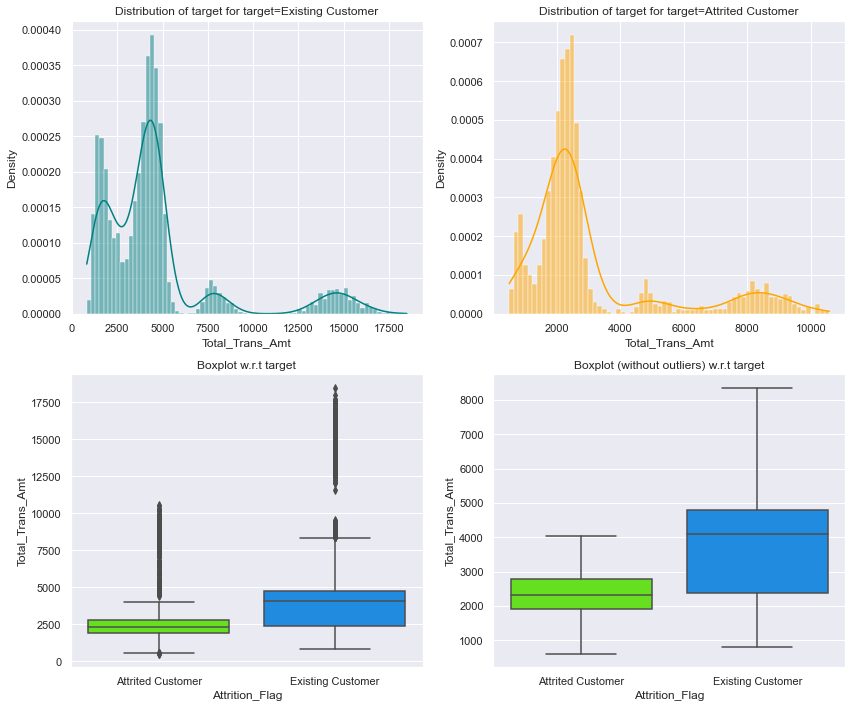

In [47]:
distribution_plot_wrt_target(data, 'Total_Trans_Amt', 'Attrition_Flag')

Total Transaction Amount wihtin the last 12 months, is higher on Existing Customers, which is left skewed. Whereas Attired Customers normally distributed. Both has Outliers

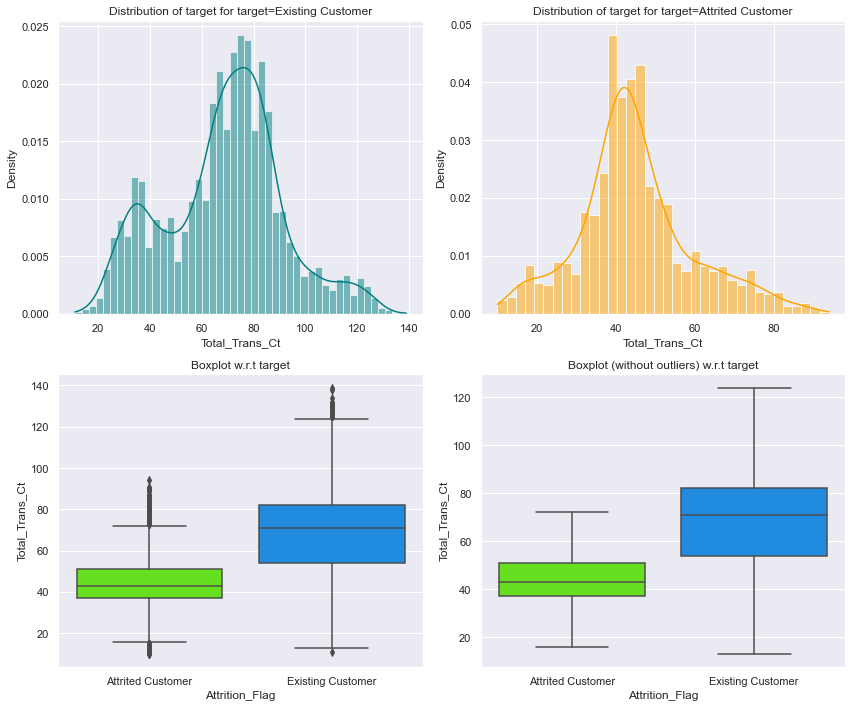

In [48]:
distribution_plot_wrt_target(data, 'Total_Trans_Ct', 'Attrition_Flag')

Total Transaction Count within last 12 months is significantly higher for Existing Customers.

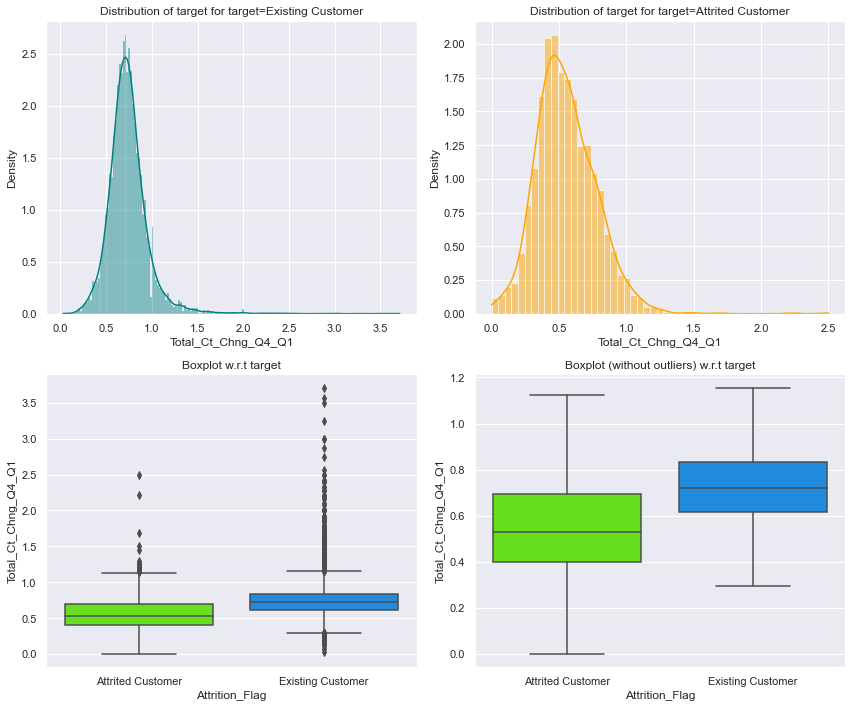

In [49]:
distribution_plot_wrt_target(data, 'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag')

Ratio of the total transaction count in 4th and 1st quarters is higher for Existing Customers. 

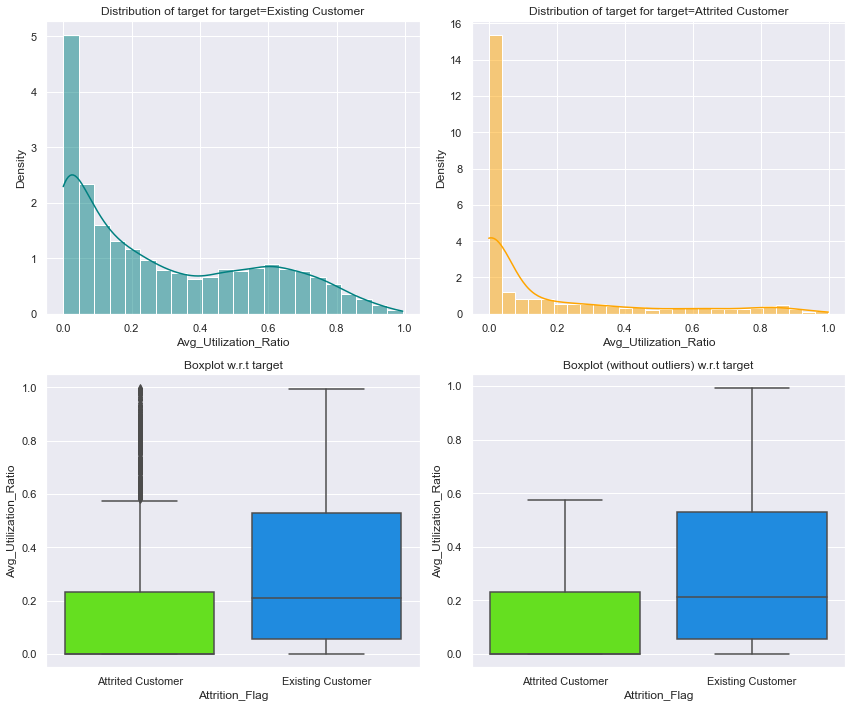

In [50]:
distribution_plot_wrt_target(data, 'Avg_Utilization_Ratio', 'Attrition_Flag')

The available credit the customer spent is in a wider range for Existing Customers, rather than on Attired ones. Attired Customers has Outliers  

In [51]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag     Attrited Customer  Existing Customer    All
Attrition_Flag                                                
Attrited Customer               1627                  0   1627
All                             1627               8500  10127
Existing Customer                  0               8500   8500
------------------------------------------------------------------------------------------------------------------------


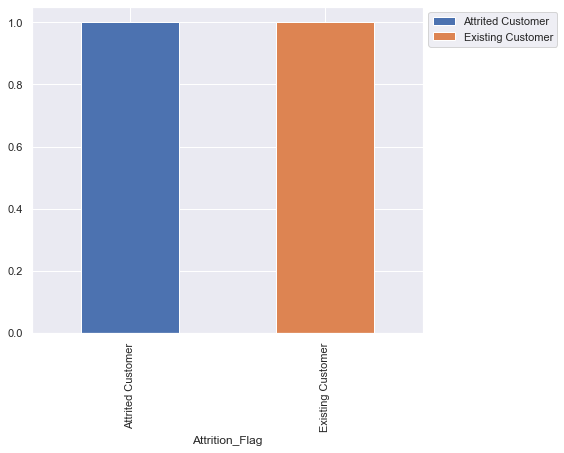

Attrition_Flag  Attrited Customer  Existing Customer    All
Customer_Age                                               
All                          1627               8500  10127
43                             85                388    473
48                             85                387    472
44                             84                416    500
46                             82                408    490
45                             79                407    486
49                             79                416    495
47                             76                403    479
41                             76                303    379
50                             71                381    452
54                             69                238    307
40                             64                297    361
42                             62                364    426
53                             59                328    387
52                             58       

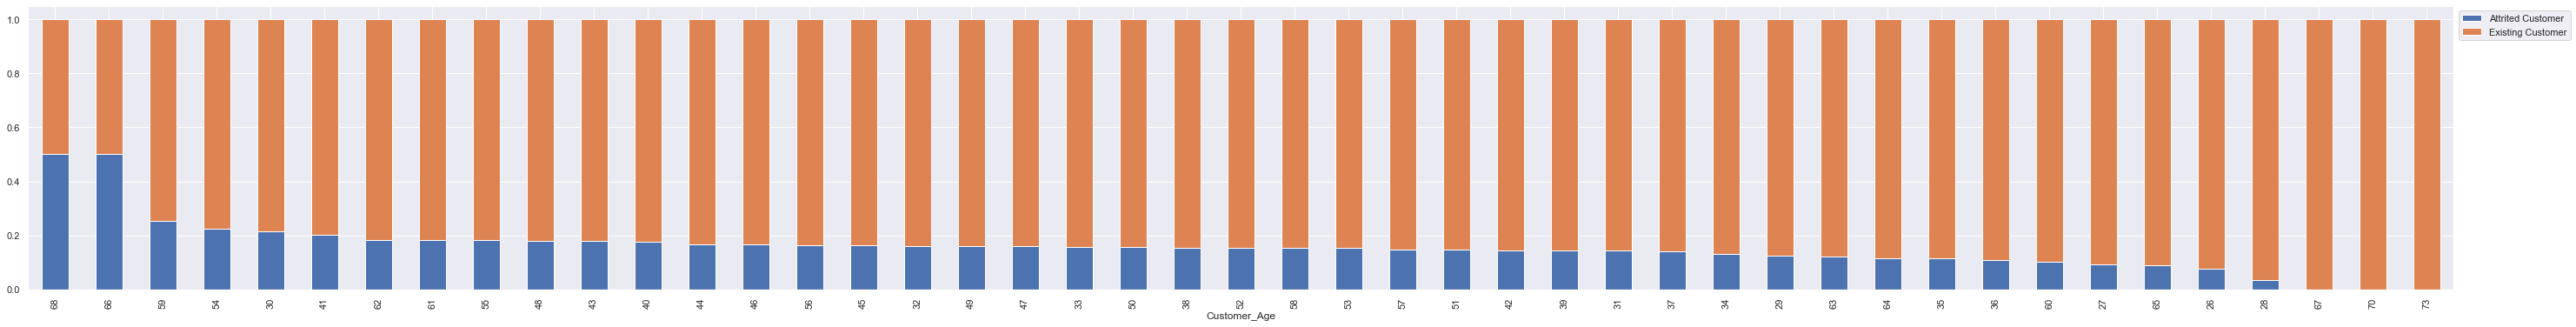

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


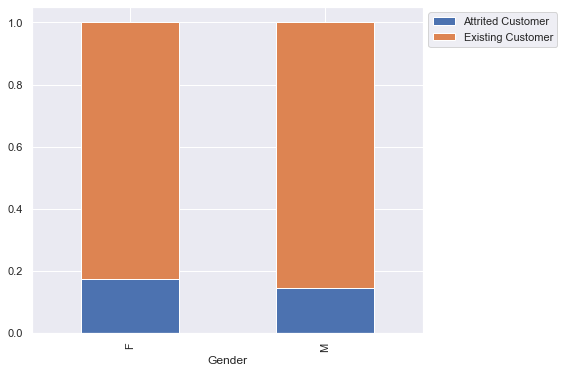

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


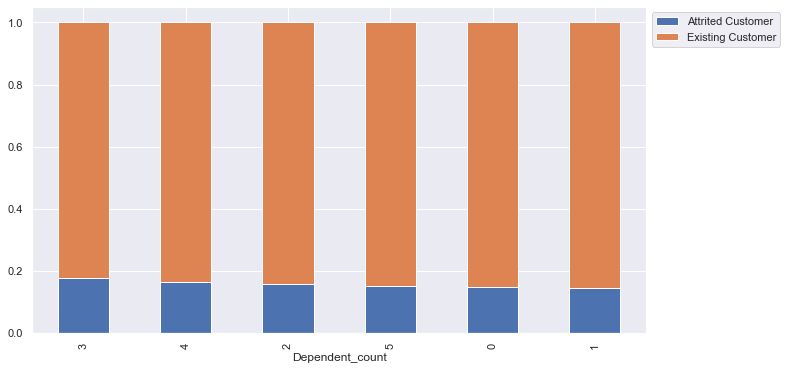

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


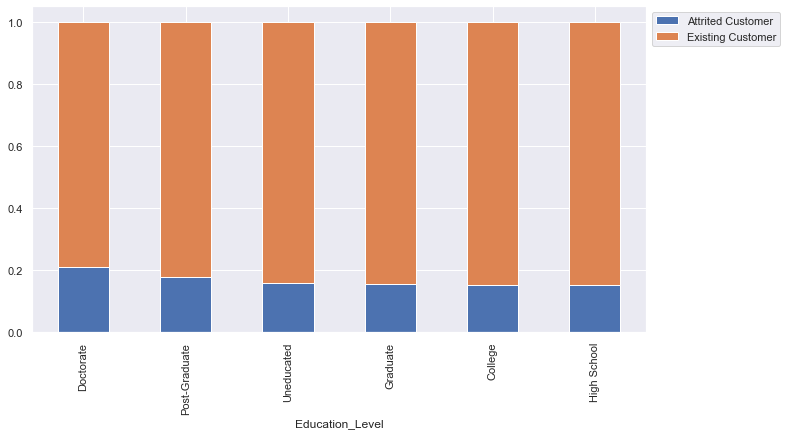

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


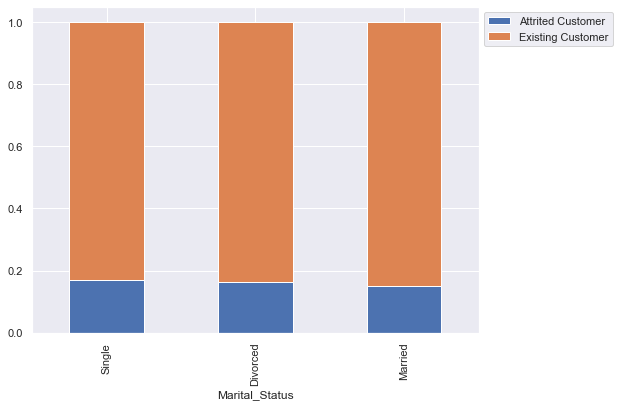

Attrition_Flag   Attrited Customer  Existing Customer   All
Income_Category                                            
All                           1440               7575  9015
Less than $40K                 612               2949  3561
$40K - $60K                    271               1519  1790
$80K - $120K                   242               1293  1535
$60K - $80K                    189               1213  1402
$120K +                        126                601   727
------------------------------------------------------------------------------------------------------------------------


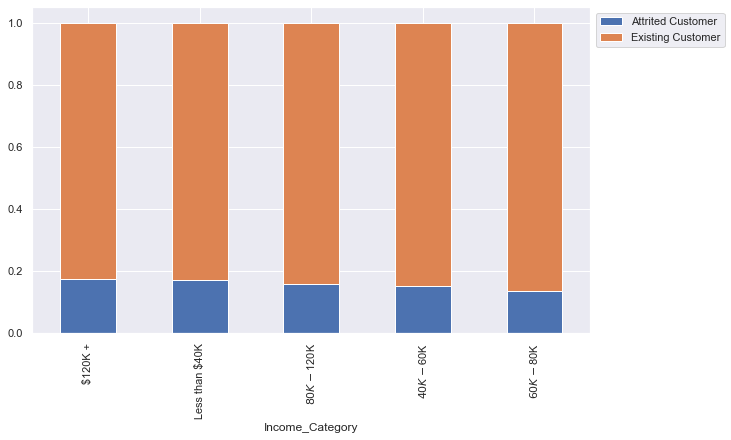

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


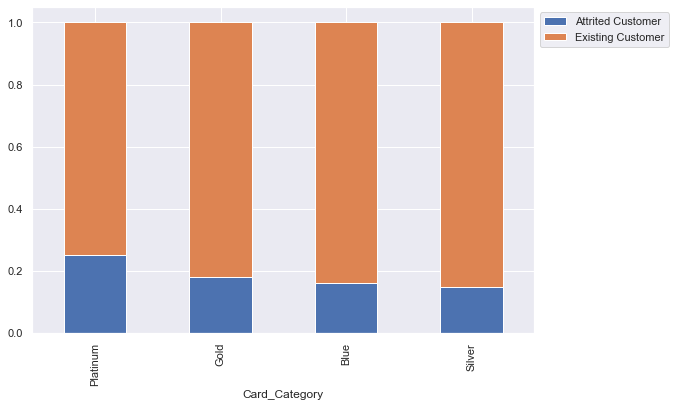

Attrition_Flag  Attrited Customer  Existing Customer    All
Months_on_book                                             
All                          1627               8500  10127
36                            430               2033   2463
39                             64                277    341
37                             62                296    358
30                             58                242    300
38                             57                290    347
34                             57                296    353
41                             51                246    297
33                             48                257    305
40                             45                288    333
35                             45                272    317
32                             44                245    289
28                             43                232    275
44                             42                188    230
43                             42       

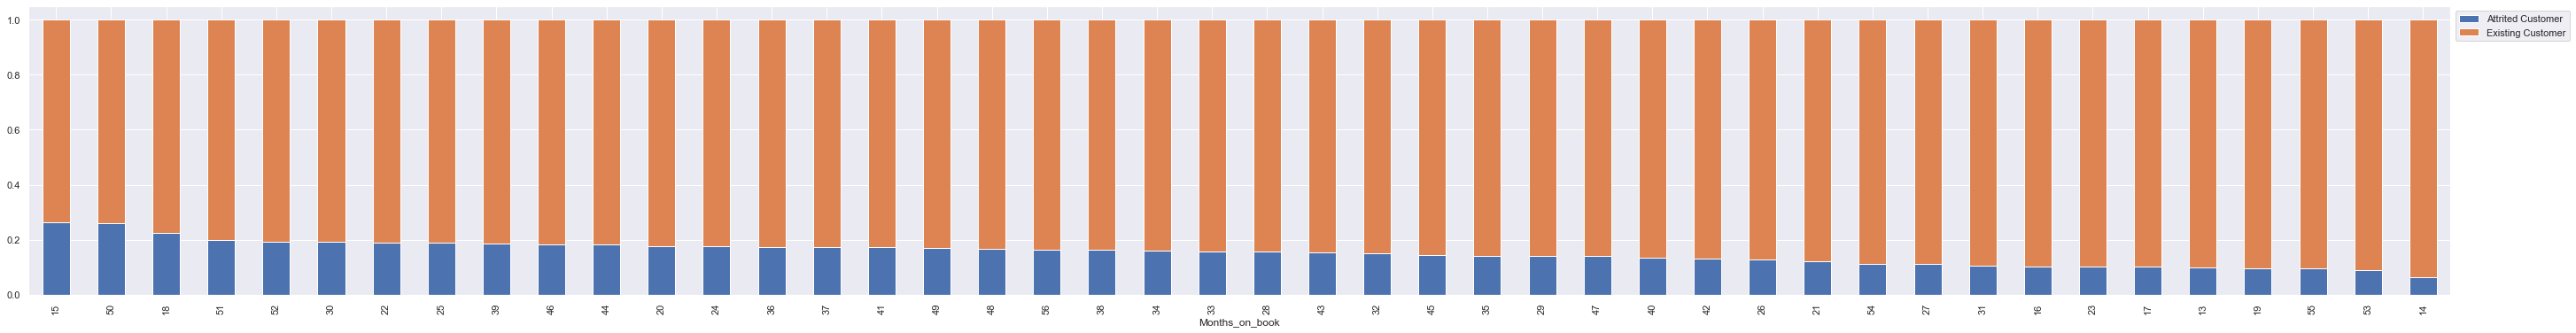

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


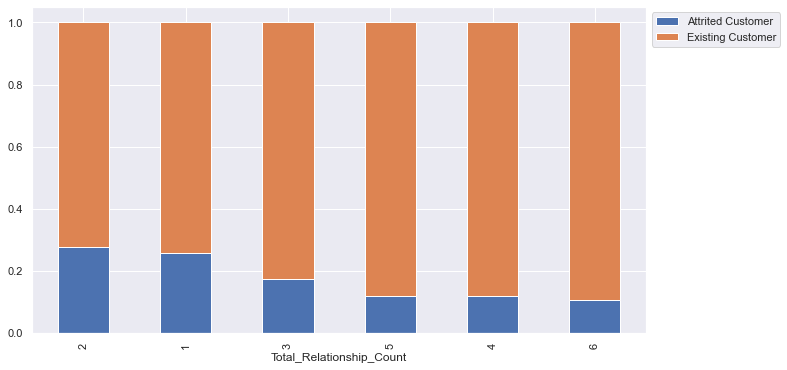

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


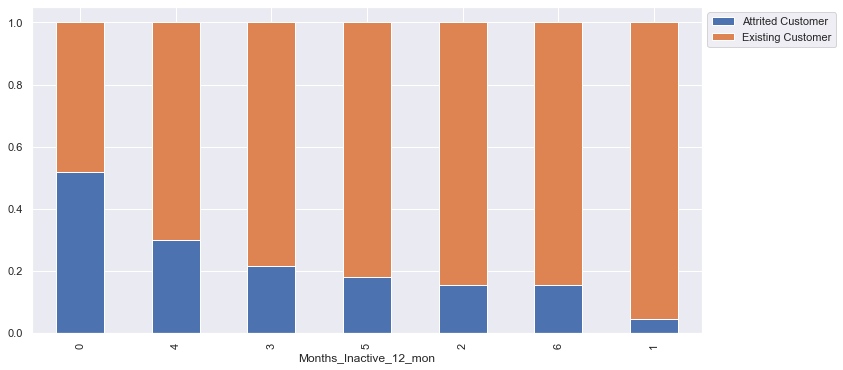

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


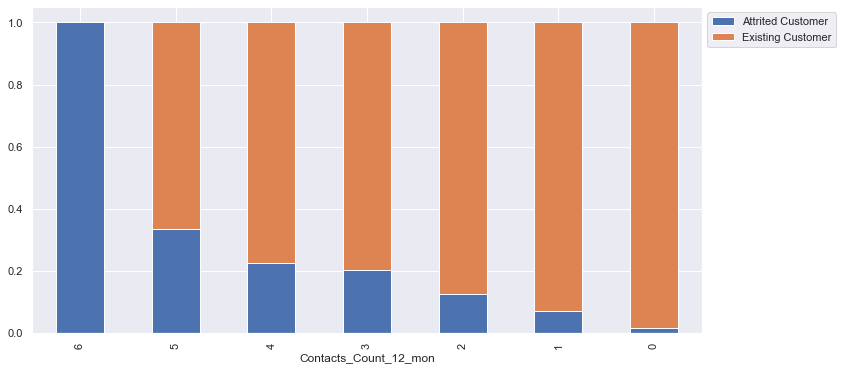

In [52]:
for col in data.columns:
    if col == 'Credit_Limit':
        break;
    stacked_barplot(data, col, 'Attrition_Flag')

* The attired Customers are mostly on their 60's and the least in 70's
* There is no big difference among the gender of customers. Female customers seems to attire more slightly
* Number of dependents doesn't have a big significants, however 3 dependents are the highest number for Attired  Customers
* Customers with Doctorate Education level tend to attire the most, followed by Post-Graduate and High school levels
* Marital status doesn't seem to have any effect on Attiring the customers or not
* Income has no big impact on attiring customers either, as level is pretty the same for all the levels
* Premium Card Category owners tend to attire more than on other types
* 15 and 50 months of relationship between a customer and bank seems the highest chance of attiring
* The least Number of products, 1 or 2 tend to get customers to attire. The more products customer enrolled to the less are chances for them to attire
* With no inactive periods with the bank, or the more customer active with the bank transactions -  the customer seems to attire, followed by 4 months of inactivity 
* Number of Contacts between the customer and bank seems to have an opposite effect, the more contact with the bank gets customer to attire

# Data Preparation

### Treating Outliers

In [53]:
def iqr_copping(df, col, factor) :
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_whisker = q3 + (factor * iqr)
    lower_whisker = q1 - (factor * iqr)       
    df[col] = np.where(df[col] > upper_whisker, upper_whisker, np.where(df[col] < lower_whisker, lower_whisker, df[col]))

In [54]:
iqr_copping(data, 'Customer_Age', 1.5)

In [55]:
# Log Transformation for Ouliers
arr = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1']
np.seterr(divide = 'ignore') 
for col in arr:
    data[col] = np.nan_to_num(np.log(data[col]), neginf=0)

In [56]:
data.describe().T

count    mean    std   min    25%     50%     75%  \
Customer_Age             10127.00   46.33   8.02 26.00  41.00   46.00   52.00   
Dependent_count          10127.00    2.35   1.30  0.00   1.00    2.00    3.00   
Months_on_book           10127.00   35.93   7.99 13.00  31.00   36.00   40.00   
Total_Relationship_Count 10127.00    3.81   1.55  1.00   3.00    4.00    5.00   
Months_Inactive_12_mon   10127.00    2.34   1.01  0.00   2.00    2.00    3.00   
Contacts_Count_12_mon    10127.00    2.46   1.11  0.00   2.00    2.00    3.00   
Credit_Limit             10127.00    8.60   0.93  7.27   7.85    8.42    9.31   
Total_Revolving_Bal      10127.00 1162.81 814.99  0.00 359.00 1276.00 1784.00   
Avg_Open_To_Buy          10127.00    8.16   1.31  1.10   7.19    8.15    9.20   
Total_Amt_Chng_Q4_Q1     10127.00   -0.31   0.29 -4.61  -0.46   -0.31   -0.15   
Total_Trans_Amt          10127.00    8.16   0.65  6.23   7.68    8.27    8.46   
Total_Trans_Ct           10127.00   64.86  23.47 10.00  45.00   67.00   81.00   
Total_Ct_Chng_Q4_Q1      10127.00   -0.39   0.34 -3.58  -0.54   -0.35   -0.20   
Avg_Utilization_Ratio    10127.00    0.27   0.28  0.00   0.02    0.18    0.50   

                             max  
Customer_Age               68.50  
Dependent_count             5.00  
Months_on_book             56.00  
Total_Relationship_Count    6.00  
Months_Inactive_12_mon      6.00  
Contacts_Count_12_mon       6.00  
Credit_Limit               10.45  
Total_Revolving_Bal      2517.00  
Avg_Open_To_Buy            10.45  
Total_Amt_Chng_Q4_Q1        1.22  
Total_Trans_Amt             9.82  
Total_Trans_Ct            139.00  
Total_Ct_Chng_Q4_Q1         1.31  
Avg_Utilization_Ratio       1.00

The above columns has been log transformed

### Missing values

In [57]:
# update target variables to Intereger 0 or 1
data['Attrition_Flag'] = data['Attrition_Flag'].replace("Existing Customer", 0).replace("Attrited Customer", 1)

In [58]:
#  Separate target variable from independent
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

In [59]:
# Split data into train, val and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [60]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


In [61]:
# Imputing missing values on Education_Level
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

X_train['Education_Level'] = imputer.fit_transform(X_train[['Education_Level']])

X_val['Education_Level'] = imputer.transform(X_val[['Education_Level']])

X_test['Education_Level'] = imputer.transform(X_test[['Education_Level']])

In [62]:
# Imputing missing values on Marital_Status
X_train['Marital_Status'] = imputer.fit_transform(X_train[['Marital_Status']])

X_val['Marital_Status'] = imputer.transform(X_val[['Marital_Status']])

X_test['Marital_Status'] = imputer.transform(X_test[['Marital_Status']])

In [63]:
# Imputing abc values on Income_Category
# Fit and transform the train data
X_train['Income_Category'] = imputer.fit_transform(X_train[['Income_Category']])

# Transform the val data
X_val['Income_Category'] = imputer.transform(X_val[['Income_Category']])

# Transform the test data
X_test['Income_Category'] = imputer.transform(X_test[['Income_Category']])

In [64]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Model evaluation criterion and Problem Statement

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

Since, as a data scientist, I am more concerned on identifying the customers who might be attriting the bank, I need to concentrate on detecting False Negative cases, to eliminate the bank losses. Hence, RECALL evaluation metric would be my priority to improve. So we can have a good prediction on customers who are actually True Positives on attiring the bank.

In [65]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [66]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Model Building

In [67]:
# Original dataset
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss", use_label_encoder=False)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = 'recall'
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scoring, cv = kfold)
    
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))
    
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 77.76399790685504
Random forest: 74.8953427524856
GBM: 81.65620094191523
Adaboost: 82.1679748822606
Xgboost: 85.65201465201466
dtree: 77.76504447933019

Validation Performance:

Bagging: 0.8159509202453987
Random forest: 0.7975460122699386
GBM: 0.8680981595092024
Adaboost: 0.8619631901840491
Xgboost: 0.8865030674846626
dtree: 0.8159509202453987


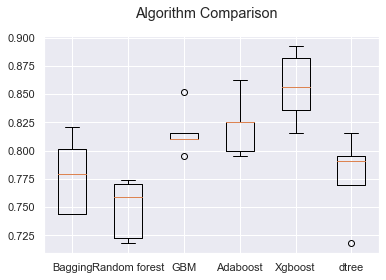

In [68]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

Based on above performance looks as all 3 Boosting models are performing very well based on CV score and recall score on Validaton set

In [69]:
# Let's oversample the dataset
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 29)
After UpSampling, the shape of train_y: (10198,) 



In [70]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss", use_label_encoder=False)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = 'recall'
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_result = cross_val_score(estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv = kfold)
    
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))
    
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 95.68556254690297
Random forest: 97.37201023687196
GBM: 96.86216783082222
Adaboost: 95.94044526544671
Xgboost: 97.96039946891415
dtree: 94.25370894186919

Validation Performance:

Bagging: 0.8159509202453987
Random forest: 0.7975460122699386
GBM: 0.8680981595092024
Adaboost: 0.8619631901840491
Xgboost: 0.8865030674846626
dtree: 0.8159509202453987


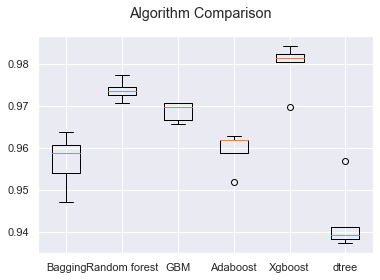

In [71]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

Based on above results, XGBoost, RandomForest and GBM models are performing the best on oversampled dataset

In [72]:
# Let's undersample the dataset
print("Before DownSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before DownSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

rus = RandomUnderSampler(random_state=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print("After DownSampling, counts of label 'Yes': {}".format(sum(y_train_under == 1)))
print("After DownSampling, counts of label 'No': {} \n".format(sum(y_train_under == 0)))


print("After DownSampling, the shape of train_X: {}".format(X_train_under.shape))
print("After DownSampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before DownSampling, counts of label 'Yes': 976
Before DownSampling, counts of label 'No': 5099 

After DownSampling, counts of label 'Yes': 976
After DownSampling, counts of label 'No': 976 

After DownSampling, the shape of train_X: (1952, 29)
After DownSampling, the shape of train_y: (1952,) 



In [73]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss", use_label_encoder=False)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = 'recall'
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_result = cross_val_score(estimator=model, X=X_train_under, y=y_train_under, scoring=scoring, cv = kfold)
    
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))
    
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 90.9832548403977
Random forest: 93.34222919937206
GBM: 94.16064887493458
Adaboost: 93.03506017791733
Xgboost: 95.39141810570382
dtree: 87.80638409209838

Validation Performance:

Bagging: 0.8159509202453987
Random forest: 0.7975460122699386
GBM: 0.8680981595092024
Adaboost: 0.8619631901840491
Xgboost: 0.8865030674846626
dtree: 0.8159509202453987


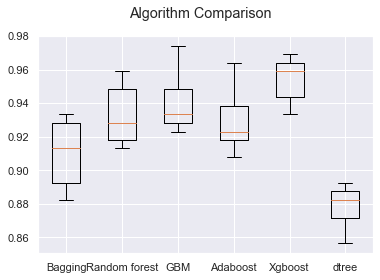

In [74]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

Based on above results, XGBoost, GBM, RandomForest are showing the best results for undersampled data

So, 
*   for original    dataset :  XGBoost, GBM and AdaBoost 
*   for oversampled dataset :  XGBoost, RandomForest and GBM
*   for undersampled dataset:  XGBoost, GBM, RandomForest 
models perform the best. 
* So as a final models I am picking XGBoost, GBM and RandomForest models using oversampled dataset, as the CV scores for those models shows as the best => 

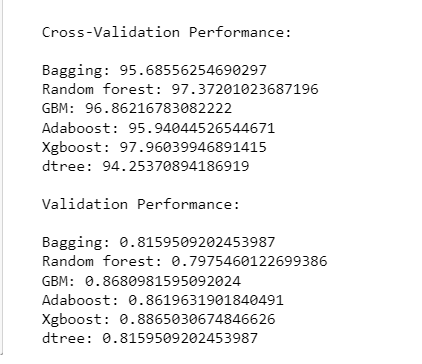

# Hypertuning

### RandomForest Randomized Search CV

In [75]:
%%time 
model = RandomForestClassifier(random_state=1)

parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "max_depth":np.arange(3,4,5),
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

scorer = metrics.make_scorer(metrics.recall_score)

# Calling Random Search
random_cv = RandomizedSearchCV(estimator=model, cv=5, param_distributions=parameters, scoring=scorer, n_jobs = -1, verbose= 2)

random_cv.fit(X_train_over, y_train_over)

print(
    "Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:{'n_estimators': 200, 'min_samples_leaf': 8, 'min_impurity_decrease': 0.002, 'max_samples': 0.3, 'max_features': 0.6000000000000001, 'max_depth': 3, 'class_weight': 'balanced_subsample'} 
Score: 0.9223381246512344
Wall time: 1min


Above Randomized CV search shows score of 92%, let's try to build a model with above parameters

In [76]:
rf_tuned = RandomForestClassifier(n_estimators= 200, min_samples_leaf= 8, min_impurity_decrease= 0.002, 
                                 max_samples= 0.3, 
                                 max_features= 0.6000000000000001, max_depth= 3, class_weight= 'balanced_subsample',
                                 random_state=1)

rf_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                       max_features=0.6000000000000001, max_samples=0.3,
                       min_impurity_decrease=0.002, min_samples_leaf=8,
                       n_estimators=200, random_state=1)

#### Let's check the model's performance

In [77]:
# Calculating different metrics on train set
rf_tuned_random_train = model_performance_classification_sklearn(
    rf_tuned, X_train_over, y_train_over
)
print("Training performance:")
rf_tuned_random_train

Training performance:


Accuracy  Recall  Precision   F1
0      0.91    0.93       0.90 0.91

In [78]:
# Calculating different metrics on val set
rf_tuned_random_val = model_performance_classification_sklearn(
    rf_tuned, X_val, y_val
)
print("Validation performance:")
rf_tuned_random_val

Validation performance:


Accuracy  Recall  Precision   F1
0      0.88    0.88       0.58 0.70

There is a small overfit on Validation dataset, however Recall looks not bad on Validation dataset.

### RandomForest GridSearch CV

In [79]:
%%time

# Choose the type of classifier. 
rf_grid = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "max_depth":np.arange(3,4,5),
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_grid, parameters, scoring=acc_scorer, cv=5, n_jobs= -1, verbose = 2)
# verbose = 2 tells about the number of fits, which can give an idea of how long will the model take in tuning
# n_jobs = -1 so that all CPU cores can be run parallelly to optimize the Search

grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Print the best combination of parameters
grid_obj.best_params_


Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
Wall time: 2h 6min 22s


{'class_weight': 'balanced_subsample',
 'max_depth': 3,
 'max_features': 0.6000000000000001,
 'max_samples': 0.3,
 'min_impurity_decrease': 0.002,
 'min_samples_leaf': 7,
 'n_estimators': 200}

In [80]:
# Get best score for GridSearch
grid_obj.best_score_

0.9223381246512344

The grid Search has score of 92%

#### Let's build a model with obtained best parameters

In [81]:
# Set the clf to the best combination of parameters
rf1_tuned = RandomForestClassifier(
    class_weight="balanced_subsample",
    max_depth=3,
    max_features=0.6000000000000001,
    max_samples=0.3,
    min_impurity_decrease=0.002,
    min_samples_leaf=7,
    n_estimators=200,    
    random_state=1    
)

# Fit the best algorithm to the data.
rf1_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                       max_features=0.6000000000000001, max_samples=0.3,
                       min_impurity_decrease=0.002, min_samples_leaf=7,
                       n_estimators=200, random_state=1)

In [82]:
# Calculating different metrics on train set
rf_tuned_grid_train = model_performance_classification_sklearn(
    rf1_tuned, X_train_over, y_train_over
)
print("Training performance:")
rf_tuned_grid_train

Training performance:


Accuracy  Recall  Precision   F1
0      0.91    0.93       0.90 0.91

In [83]:
# Calculating different metrics on val set
rf_tuned_grid_val = model_performance_classification_sklearn(
    rf1_tuned, X_val, y_val
)
print("Validation performance:")
rf_tuned_grid_val

Validation performance:


Accuracy  Recall  Precision   F1
0      0.88    0.88       0.58 0.70

Both Grid Search and Randomized Search parameters gave exactly the same results.

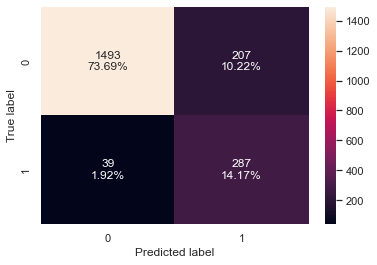

In [84]:
# creating confusion matrix
confusion_matrix_sklearn(rf1_tuned, X_val, y_val)

FalseNegative is 39 cases, while FalsePositive is 207

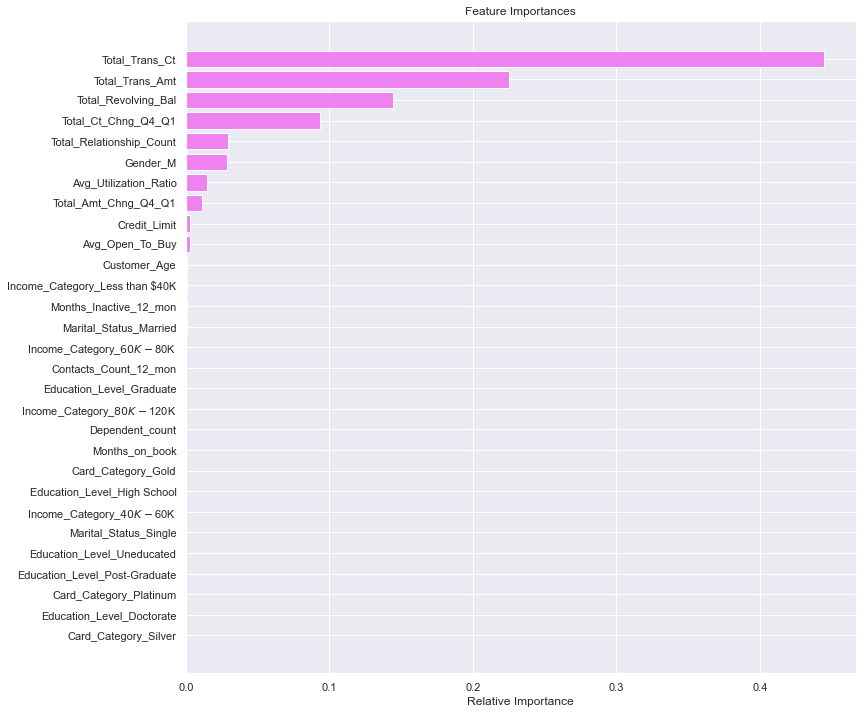

In [85]:
feature_names = X_train.columns
importances = rf1_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Based on RandomForest model => Total_Trans_Ct is the max important feature, followed by Total_Trans_Amt, Total_Revolving_Bal and Total_Ct_Chng_Q4_Q1

## GBM RandomSearch CV 

In [86]:
grad_model = GradientBoostingClassifier(random_state=1)

Parameters = {
    "init": [
        AdaBoostClassifier(random_state=1),
        DecisionTreeClassifier(random_state=1),
    ],
    "n_estimators": np.arange(75, 150, 25),
    "learning_rate": [0.1, 0.01, 0.05, 1],
    "subsample": [0.5, 0.7, 1],
    "max_features": [0.5, 0.7, 1],
}

# Calling GridSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=grad_model,
    param_distributions=Parameters,
    n_jobs=-1,
    n_iter=50,
    scoring='recall',
    cv=5,
    random_state=1,)

randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best Parameters:{} \nScore: {}".format(randomized_cv.best_params_, randomized_cv.best_score_)
)

Best Parameters:{'subsample': 1, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} 
Score: 0.9443042967923185


Above Randomized CV search shows score of 94%, let's try to build a model with above parameters

In [87]:
grad_tuned_model = GradientBoostingClassifier(subsample=1, n_estimators=125, max_features=0.7, learning_rate=0.01,
                                              init=AdaBoostClassifier(random_state=1),
                                              random_state=1)

grad_tuned_model.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=1)

In [88]:
# Calculating different metrics on train set
gb_tuned_random_train = model_performance_classification_sklearn(
    grad_tuned_model, X_train_over, y_train_over
)
print("Training performance:")
gb_tuned_random_train

Training performance:


Accuracy  Recall  Precision   F1
0      0.93    0.95       0.91 0.93

In [89]:
# Calculating different metrics on val set
gb_tuned_random_val = model_performance_classification_sklearn(
    grad_tuned_model, X_val, y_val
)
print("Validation performance:")
gb_tuned_random_val

Validation performance:


Accuracy  Recall  Precision   F1
0      0.91    0.91       0.65 0.76

The GB model is performing very well using RandomizedSearchCV as on Training and Validation datasets with recall = 91% on validation dataset

### GBM GridSearch CV

In [90]:
grad_model = GradientBoostingClassifier(random_state=1)

parameters = {
    "init": [
        AdaBoostClassifier(random_state=1),
        DecisionTreeClassifier(random_state=1),
    ],
    "n_estimators": np.arange(75, 150, 25),
    "learning_rate": [0.1, 0.01, 0.05, 1],
    "subsample": [0.5, 0.7, 1],
    "max_features": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(grad_model, parameters, scoring=acc_scorer, cv=5, n_jobs= -1, verbose = 2)
# verbose = 2 tells about the number of fits, which can give an idea of how long will the model take in tuning
# n_jobs = -1 so that all CPU cores can be run parallelly to optimize the Search

grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Print the best combination of parameters
grid_obj.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


{'init': AdaBoostClassifier(random_state=1),
 'learning_rate': 0.01,
 'max_features': 0.7,
 'n_estimators': 125,
 'subsample': 1}

In [91]:
# Get best score for GridSearch
grid_obj.best_score_

0.9443042967923185

GridSearchCV also gives 94% of score, let's try out the parameters on a model

In [92]:
grad_tuned1_model = GradientBoostingClassifier(subsample=1, n_estimators=125, max_features=0.7, learning_rate=0.01,
                                              init=AdaBoostClassifier(random_state=1),
                                              random_state=1)

grad_tuned1_model.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=1)

In [93]:
# Calculating different metrics on train set
gb_tuned_grid_train = model_performance_classification_sklearn(
    grad_tuned1_model, X_train_over, y_train_over
)
print("Training performance:")
gb_tuned_grid_train

Training performance:


Accuracy  Recall  Precision   F1
0      0.93    0.95       0.91 0.93

In [94]:
# Calculating different metrics on val set
gb_tuned_grid_val = model_performance_classification_sklearn(
    grad_tuned1_model, X_val, y_val
)
print("Validation performance:")
gb_tuned_grid_val

Validation performance:


Accuracy  Recall  Precision   F1
0      0.91    0.91       0.65 0.76

GridSearch CV on GBM gives a generalized results on Validation dataset.

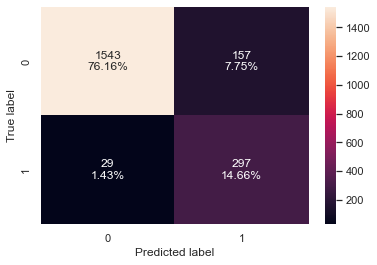

In [95]:
# creating confusion matrix
confusion_matrix_sklearn(grad_tuned1_model, X_val, y_val)

False Negative cases are 29 cases, while False Positive is 157

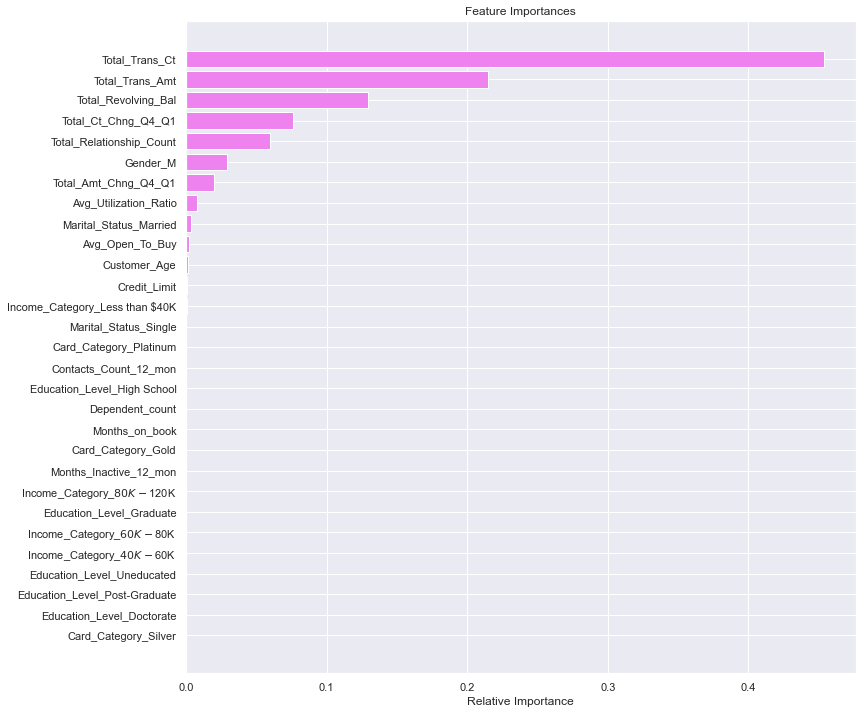

In [96]:
# Plot feature Importances
feature_names = X_train.columns
importances = grad_tuned1_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Based on GB model => Total_Trans_Ct is the max important feature, followed by Total_Trans_Amt, 
Total_Revolving_Bal and Total_Ct_Chng_Q4_Q1 along with Total_Relationship_Count

### XGBoost Randomized Search CV

In [97]:
%%time 
model = XGBClassifier(random_state=1, eval_metric='logloss', use_label_encoder=False)

param_grid = {
    'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]
}

scorer = metrics.make_scorer(metrics.recall_score)

# Calling Random Search
random_cv = RandomizedSearchCV(estimator=model, cv=5, param_distributions=param_grid, scoring=scorer, n_jobs = -1, verbose= 2)

random_cv.fit(X_train_over, y_train_over)

print(
    "Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:{'subsample': 0.9, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.05, 'gamma': 1} 
Score: 0.9964696261232657
Wall time: 24.9 s


The score for XGBoost is pretty impressive, as it is ~ 99%, let's try to build a model with above parameters

In [98]:
xg_tuned_model = XGBClassifier(subsample=0.9, scale_pos_weight=10, reg_lambda=5, n_estimators=50, max_depth=1, 
                               learning_rate=0.05, gamma=1, eval_metric='logloss',
                                random_state=1, use_label_encoder=False)

xg_tuned_model.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [99]:
# Calculating different metrics on train set
xg_tuned_random_train = model_performance_classification_sklearn(
    xg_tuned_model, X_train_over, y_train_over
)
print("Training performance:")
xg_tuned_random_train

Training performance:


Accuracy  Recall  Precision   F1
0      0.62    1.00       0.57 0.72

In [100]:
# Calculating different metrics on val set
xg_tuned_random_val = model_performance_classification_sklearn(
    xg_tuned_model, X_val, y_val
)
print("Validation performance:")
xg_tuned_random_val

Validation performance:


Accuracy  Recall  Precision   F1
0      0.35    0.98       0.20 0.33

Recall on Randomized SearchCV is impressive even on Validation dataset, 98%, however the downside is the fact that Accuracy is low, and definitely there is an overfit on validation set.

### XGBoost GridSearch CV 

In [101]:
xg_model = XGBClassifier(random_state=1, eval_metric='logloss', use_label_encoder=False)

parameters = {
    'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xg_model, parameters, scoring=acc_scorer, cv=5, n_jobs= -1, verbose = 2)
# verbose = 2 tells about the number of fits, which can give an idea of how long will the model take in tuning
# n_jobs = -1 so that all CPU cores can be run parallelly to optimize the Search

grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Print the best combination of parameters
grid_obj.best_params_

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


{'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 1,
 'n_estimators': 50,
 'reg_lambda': 10,
 'scale_pos_weight': 10,
 'subsample': 1}

In [102]:
# Get best score for GridSearch
grid_obj.best_score_

0.9988227597221421

Got ~99% score on XGBoost GridSearchCV, let's try it out on a model

In [103]:
xg_tuned1_model = XGBClassifier(subsample=1, scale_pos_weight=10, reg_lambda=10, n_estimators=50, max_depth=1, 
                               learning_rate=0.05, gamma=0, eval_metric='logloss',
                                random_state=1, use_label_encoder=False)

xg_tuned1_model.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [104]:
# Calculating different metrics on train set
xg_tuned_grid_train = model_performance_classification_sklearn(
    xg_tuned1_model, X_train_over, y_train_over
)
print("Training performance:")
xg_tuned_grid_train

Training performance:


Accuracy  Recall  Precision   F1
0      0.62    1.00       0.57 0.72

In [105]:
# Calculating different metrics on val set
xg_tuned_grid_val = model_performance_classification_sklearn(
    xg_tuned1_model, X_val, y_val
)
print("Validation performance:")
xg_tuned_grid_val

Validation performance:


Accuracy  Recall  Precision   F1
0      0.35    0.98       0.20 0.33

The Recall is also very good 98% but Accuracy is pretty low => 35%

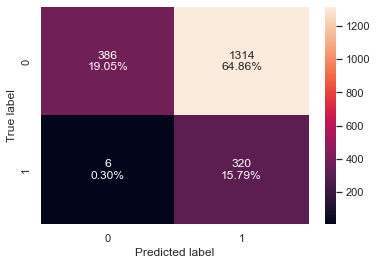

In [106]:
# creating confusion matrix
confusion_matrix_sklearn(xg_tuned1_model, X_val, y_val)

False Negative cases are only 6, however Precision - False Positive cases are up to ~65%

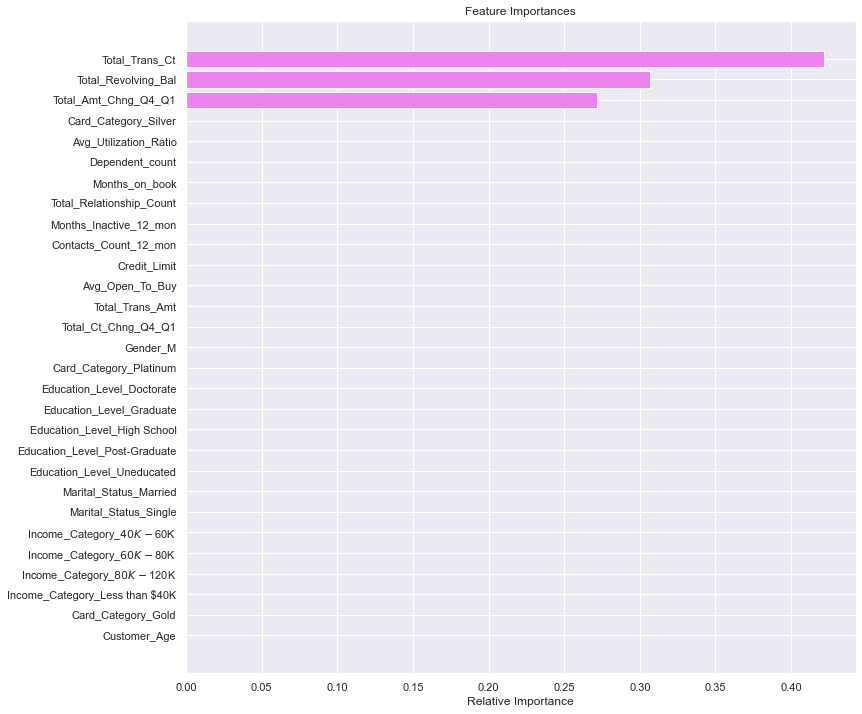

In [107]:
# Plot feature Importances
feature_names = X_train.columns
importances = xg_tuned1_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Based on XGBoost model => Total_Trans_Ct is the max important feature, followed by Total_Revolving_Bal and Total_Amt_Chng_Q4_Q1 

### Comparing all model results

In [108]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_tuned_grid_train.T,
        rf_tuned_random_train.T,
        gb_tuned_grid_train.T,
        gb_tuned_random_train.T,
        xg_tuned_grid_train.T,
        xg_tuned_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Tuned with Grid search",
    "Random Forest Tuned with Random search",
    "Gradient Boosting Tuned with Grid search",
    "Gradient Boosting Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Random Forest Tuned with Grid search  \
Accuracy                                   0.91   
Recall                                     0.93   
Precision                                  0.90   
F1                                         0.91   

           Random Forest Tuned with Random search  \
Accuracy                                     0.91   
Recall                                       0.93   
Precision                                    0.90   
F1                                           0.91   

           Gradient Boosting Tuned with Grid search  \
Accuracy                                       0.93   
Recall                                         0.95   
Precision                                      0.91   
F1                                             0.93   

           Gradient Boosting Tuned with Random search  \
Accuracy                                         0.93   
Recall                                           0.95   
Precision                                        0.91   
F1                                               0.93   

           Xgboost Tuned with Grid search  Xgboost Tuned with Random Search  
Accuracy                             0.62                              0.62  
Recall                               1.00                              1.00  
Precision                            0.57                              0.57  
F1                                   0.72                              0.72

In [109]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        rf_tuned_grid_val.T,
        rf_tuned_random_val.T,
        gb_tuned_grid_val.T,
        gb_tuned_random_val.T,
        xg_tuned_grid_val.T,
        xg_tuned_random_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Random Forest Tuned with Grid search",
    "Random Forest Tuned with Random search",
    "Gradient Boosting Tuned with Grid search",
    "Gradient Boosting Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Random Forest Tuned with Grid search  \
Accuracy                                   0.88   
Recall                                     0.88   
Precision                                  0.58   
F1                                         0.70   

           Random Forest Tuned with Random search  \
Accuracy                                     0.88   
Recall                                       0.88   
Precision                                    0.58   
F1                                           0.70   

           Gradient Boosting Tuned with Grid search  \
Accuracy                                       0.91   
Recall                                         0.91   
Precision                                      0.65   
F1                                             0.76   

           Gradient Boosting Tuned with Random search  \
Accuracy                                         0.91   
Recall                                           0.91   
Precision                                        0.65   
F1                                               0.76   

           Xgboost Tuned with Grid search  Xgboost Tuned with Random Search  
Accuracy                             0.35                              0.35  
Recall                               0.98                              0.98  
Precision                            0.20                              0.20  
F1                                   0.33                              0.33

XGBoost shows the best result on Recall, followed by GB model. Even though GBM shows more stable results for Accuracy and Precision metrics, we more concerned about eliminating False Negative cases, hence Recall is our priority. So from above results, XGBoost is our model to go with.

# SHAP

In [110]:
shap.initjs()

In [113]:
explainer = shap.TreeExplainer(xg_tuned_model, enable_categorical=True)
shap_values = explainer.shap_values(X_val)

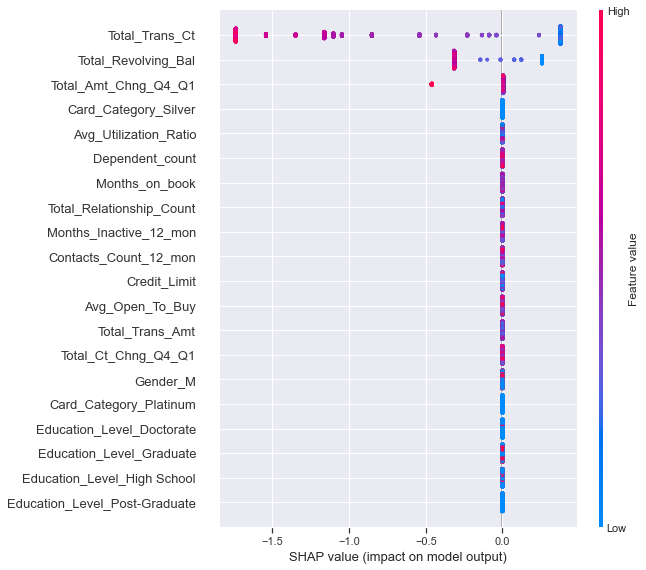

In [114]:
# Make plot.
shap.summary_plot(shap_values, X_val)

Based on above results, 
* lower the value of Total_Trans_Ct the higher the value of the feature for the model
* Total_Revolving_bal has a higher value to the model, as the number of it is smaller
* Somewhat same impact on Total_Amt_Chang_Q4_Q1, the higher the number => less value it has for the model output

# Pipelines for productionizing the model
Now, we have a final model. let's use pipelines to put the model into production

### Column Transformer

In [115]:
data=df.copy()

In [116]:
# update target variables to Integer 0 or 1
data['Attrition_Flag'] = data['Attrition_Flag'].replace("Existing Customer", 0).replace("Attrited Customer", 1)

X = data.drop('Attrition_Flag', axis=1)
y=data['Attrition_Flag']

In [117]:
# function for Log Transformation of Ouliers
def logtrans(X, cols):   
    np.seterr(divide = 'ignore') 
    for col in cols: 
        X[col] = np.nan_to_num(np.log(X[col]), neginf=0)

In [118]:
# creating a list of numerical variables
numerical_features = ["Customer_Age", "Dependent_count", "Months_on_book", "Total_Relationship_Count", "Months_Inactive_12_mon",
                     "Contacts_Count_12_mon", "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy",
                     "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1",
                     "Avg_Utilization_Ratio"]
logtrans_features = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1']

    
# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[('capping', iqr_copping(data, 'Customer_Age', 1.5)),
                                      ("logtrans", logtrans(X, logtrans_features))])


# creating a list of categorical variables
categorical_features = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category"
]

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),        
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)


# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

In [119]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 20) (3039, 20)


In [120]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(subsample=1, scale_pos_weight=10, reg_lambda=10, n_estimators=50, max_depth=1, 
                               learning_rate=0.05, gamma=0, eval_metric='logloss',
                                random_state=1, use_label_encoder=False)
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('capping',
                                                                   None),
                                                                  ('logtrans',
                                                                   None)]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                               

In [121]:
# transforming and predicting on test data
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [122]:
# Calculating different metrics on test set
xg_tuned_grid_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
print("Testing performance:")
xg_tuned_grid_test

Testing performance:


Accuracy  Recall  Precision   F1
0      0.68    0.91       0.33 0.48

Wow! Based on above results for the Test data on Production, our model is doing really well on Recall.

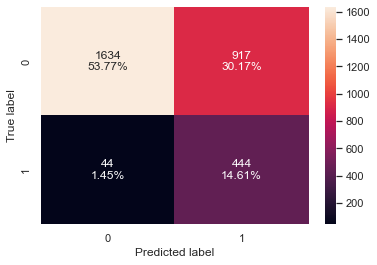

In [123]:
# creating confusion matrix
confusion_matrix_sklearn(model, X_test, y_test)

The above matrix shows 44 cases of False Negative cases, which is 1.45% on a test dataset.

# Insights & Recommendations

XGBClassifier is the model we picked for this problem, which has been tuned using the best parameters that raised the Recall up to 91%

Based on Feature Importance and SHAP graphs,
* Total_Trans_Ct => Total Transaction count has a maximum impact on a model, based on this, customers who has the lowest activity tend to attire the bank. The suggestion would be providing a promotional credit amounts to those customers to attract them to perform transactions, transfers so they can get an interest back again. Another idea would be a little risky, but still would get customers's interest on maintaining accounts is, adding a penalty fees for accounts that doesn't have any activities within 30 days. Account holder would be interested himself in doing transactions just to avoid any fees.

* Total_Revolving_Bal => The balance that carries over from one month to the next, usually carries interest rates, so usually customers try to avoid them by paying off or not even getting involved into Revolving the balance. So as a suggestion bank, could extend the period of time the customer should re-pay the remaining balance. That could encourage customers to actually use card for stuff that might be overpriced, but still use the card with a thought that he could still meet the deadline untill a date the interest rate/penalty gets applied.

* Total_Amt_Chng_Q4_Q1 => Q4 and Q1 are the months of Holidays and big shopping period, hence customers tend to spend a lot more than on other quarters. Attrited Customers has a wider range of usage, maybe in order to keep customers during those times, bank could offer a new type of credit cards that could carry type of points, like travel points, fuel points that could be redeemed if a customer spends N amount of money. The hunt for the points would keep the customers interested and willing to use the card on each shopping time. 